---

# 1.2- Load Data

In [7]:
df = pd.DataFrame(pd.read_json('/content/drive/MyDrive/Colab Notebooks/Kaggle/News-Category/dataset/News_Category_Dataset_v2.json', lines=True)).sample(frac=1.) # .sample(frac=1.) to shuffle

print('total data: ', len(df))
print(df.head())

total data:  200853
              category             headline              authors                 link    short_description       date
56274            CRIME  Shooting Rampage...                       https://www.huff...  ORLANDO, Fla., J... 2016-06-12
9929          POLITICS  Donald Trump Las...        Mollie Reilly  https://www.huff...  The president cr... 2017-12-09
163271  STYLE & BEAUTY  Model Kate Moss ...  Catherine Garvin...  https://www.huff...  Golden girl mode... 2013-03-07
190013         DIVORCE  7 Ways Single Mo...                       https://www.huff...  “Am I the only s... 2012-05-24
13564         POLITICS  Sen. Sherrod Bro...           Igor Bobic  https://www.huff...  Echoing comments... 2017-10-22


---

# 1.3- Use Just the Important Columns for the Classification

Notice that there is dublicated news in the data which means that the text was categorized for more then one class. But since the dublicates are a small amount (few hundreds), we will remove them to avoid making it multi-label classification

In [8]:
df = df[['category', 'headline', 'short_description']]
print('data shape', df.shape)
df.drop_duplicates(inplace=True)

df['text'] = df['headline'] + ' ' + df['short_description']
df.drop(['headline', 'short_description'], axis=1, inplace=True)

print(df.head())
print('data shape', df.shape)

data shape (200853, 3)
              category                 text
56274            CRIME  Shooting Rampage...
9929          POLITICS  Donald Trump Las...
163271  STYLE & BEAUTY  Model Kate Moss ...
190013         DIVORCE  7 Ways Single Mo...
13564         POLITICS  Sen. Sherrod Bro...
data shape (200383, 2)


---
# 1.4- Combine Similar Classes for Balancing data(if possible)
I did this clustering very carefully by looping through every class and see how they are relevant to each other by printing samples of texts for each class (but not in the notebook, to make it clean).

First let's see the distribution of the classes:

In [9]:
print(df['category'].value_counts())

POLITICS          32722
WELLNESS          17822
ENTERTAINMENT     16054
TRAVEL             9884
STYLE & BEAUTY     9516
PARENTING          8649
HEALTHY LIVING     6689
QUEER VOICES       6311
FOOD & DRINK       6226
BUSINESS           5935
COMEDY             5165
SPORTS             4884
BLACK VOICES       4525
HOME & LIVING      4163
PARENTS            3897
THE WORLDPOST      3664
WEDDINGS           3651
IMPACT             3458
DIVORCE            3423
WOMEN              3405
CRIME              3401
MEDIA              2813
WEIRD NEWS         2670
GREEN              2617
WORLDPOST          2579
RELIGION           2549
STYLE              2247
SCIENCE            2178
WORLD NEWS         2176
TASTE              2096
TECH               2033
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1338
ENVIRONMENT        1322
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1029
EDUCATION          1004
Name: category, 

Now let's combine the similar classes and see if the distribution will be better.

In [10]:
print(f"total categories: {len(df['category'].unique())}")

categories = {'TASTE': 'FOOD & DRINK', 'FOOD & DRINK': 'FOOD & DRINK', # FOOD & DRINK 2 classes
              'EDUCATION': 'EDUCATION', 'COLLEGE': 'EDUCATION', # EDUCATION 2 classes
              'PARENTING': 'PARENTING', 'PARENTS': 'PARENTING', # PARENTING  2 classes
              'HEALTH': 'HEALTH', 'HEALTHY LIVING': 'HEALTH', 'WELLNESS': 'HEALTH', # HEALTH 3 classes
              'WORLDPOST': 'WORLDPOST', 'THE WORLDPOST': 'WORLDPOST', # WORLDPOST 2 classes
              'CULTURE & ARTS': 'CULTURE & ARTS', 'ARTS': 'CULTURE & ARTS', 'ARTS & CULTURE': 'CULTURE & ARTS', # 'CULTURE & ARTS 3 classes
              'WEDDINGS': 'DIVORCE & WEDDINGS', 'DIVORCE': 'DIVORCE & WEDDINGS', # DIVORCE & WEDDINGS 2 classes
              'BUSINESS': 'BUSINESS & ECONOMY', 'MONEY': 'BUSINESS & ECONOMY', # BUSINESS & ECONOMY 2 classes
              'WEIRD NEWS': 'WEIRD NEWS', 'QUEER VOICES': 'WEIRD NEWS', # WEIRD NEWS 2 classes
              'ENTERTAINMENT': 'ENTERTAINMENT', 'COMEDY': 'ENTERTAINMENT', # ENTERTAINMENT 2 classes
              'POLITICS': 'POLITICS', 'WORLD NEWS': 'POLITICS', 'LATINO VOICES': 'POLITICS', # POLITICS 3 classes
              'GOOD NEWS': 'CASUAL', 'FIFTY': 'CASUAL', 'HOME & LIVING': 'CASUAL', # CASUAL 3 classes
              'ENVIRONMENT': 'ENVIRONMENT', 'GREEN': 'ENVIRONMENT', # ENVIRONMENT 2 classes
              'STYLE & BEAUTY': 'STYLE & BEAUTY', 'STYLE': 'STYLE & BEAUTY'} # STYLE & BEAUTY 2 classes

df['category'] = df['category'].replace(categories)
print(f"total categories after clustering: {len(df['category'].unique())}")

print(df['category'].value_counts())

total categories: 41
total categories after clustering: 24
POLITICS              36027
HEALTH                24511
ENTERTAINMENT         21219
PARENTING             12546
STYLE & BEAUTY        11763
TRAVEL                 9884
WEIRD NEWS             8981
FOOD & DRINK           8322
BUSINESS & ECONOMY     7642
DIVORCE & WEDDINGS     7074
CASUAL                 6962
WORLDPOST              6243
SPORTS                 4884
BLACK VOICES           4525
ENVIRONMENT            3939
CULTURE & ARTS         3876
IMPACT                 3458
WOMEN                  3405
CRIME                  3401
MEDIA                  2813
RELIGION               2549
SCIENCE                2178
EDUCATION              2148
TECH                   2033
Name: category, dtype: int64


---
# 1.5- Use Top-10 Classes for Classification

It's still not good enaugh to classify all the classes. So because the data till now is imbalanced, we will just pick the top/bigest 10 categories:

POLITICS: 36027

HEALTH: 24511

ENTERTAINMENT: 21219

PARENTING: 12546

STYLE & BEAUTY: 11763

TRAVEL: 9884

WEIRD NEWS: 8981

FOOD & DRINK: 8322

BUSINESS & ECONOMY: 7642

DIVORCE & WEDDINGS: 7074

In [11]:
categories_data = []
text_data = []
before = len(df)
print('data shape ', df.shape)
for i, value in enumerate(df['category']):
    if value in ['POLITICS', 'HEALTH', 'ENTERTAINMENT', 'PARENTING','STYLE & BEAUTY','TRAVEL',
                 'WEIRD NEWS', 'FOOD & DRINK', 'BUSINESS & ECONOMY', 'DIVORCE & WEDDINGS']:
        
        categories_data.append(value)
        text_data.append(df['text'].values[i])

df = pd.DataFrame({'text': text_data, 'category': categories_data})
after = len(df)

print('data shape after using top-10 classes', df.shape)
print('total removed data : ', before - after)

data shape  (200383, 2)
data shape after using top-10 classes (147969, 2)
total removed data :  52414


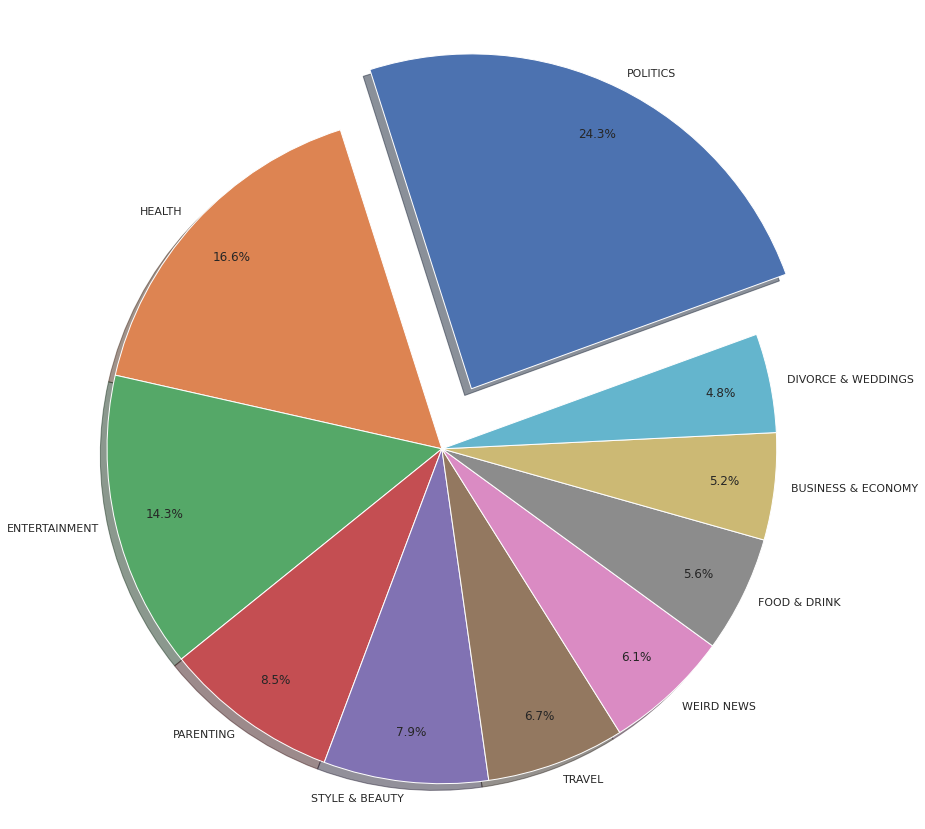

In [12]:
plt.figure(figsize=(15,15))
sizes = df.category.value_counts().values
labels = df.category.value_counts().index
plt.pie(sizes, labels=labels, autopct='%.1f%%',
        shadow=True, pctdistance=0.85, labeldistance=1.05, startangle=20, 
        explode = [0 if i > 0 else 0.2 for i in range(len(sizes))])
plt.axis('equal')
plt.show()

---
# 2-Feature Engineering



# 2.1- Extract Features(lexicon) from Text before Cleaning (words count, upper count ...)

We will extract some features from the text before cleaning the text. Some times these features make alot of sense to the classifier. We will see how each feature is has different distribution from class to another in *Text Analysis* section.

In [13]:
df['n_upper'] = df['text'].apply(lambda x: sum([1 for w in x.split() if w.isupper()])) # WORD
df['n_lower'] = df['text'].apply(lambda x: sum([1 for w in x.split() if w.islower()])) # word
df['n_digit'] = df['text'].apply(lambda x: sum([1 for w in x.split() if w.isdigit()])) # 3346
df['n_title'] = df['text'].apply(lambda x: sum([1 for w in x.split() if w.istitle()])) # Word
df['n_special_ch'] = df['text'].apply(lambda x: sum([1 for w in x if w in string.punctuation])) # %@&()*-
df['n_words'] = df['text'].apply(lambda x: sum([1 for _ in x.split()])) # total words count
df['n_uniques'] = df['text'].apply(lambda x: len(set([w for w in x.split()]))) # total vocabs

---
# 2.2- Clean the text (lower, stopwords, stemming, lammatizing, correcting, removing and more) using a big function

The function will do lots of things, you can read it if you want, but it will just clean the text from any useless word.

In [14]:
def text_cleaner(text):
    import re, nltk
    from nltk.corpus import stopwords
    from nltk.stem import wordnet
    tweet = text.lower()

    tweet = re.sub("\?{1,}", " ? ", tweet)
    tweet = re.sub("\!{1,}", " ! ", tweet)
    tweet = re.sub("\-{1,}", " - ", tweet)
    
    tweet = re.sub(r"janu[ae]ry|febru[ae]ry|march|april|may|june|july|august|september|october|november|december", " month ", tweet)
    tweet = re.sub(r"http\S+", " url ", tweet)
    tweet = re.sub(r"\S+\@\S+", " email ", tweet)
    tweet = re.sub(r" \@\S+", " username ", tweet)
    tweet = re.sub("\s{2,}", " ", tweet)
    tweet = re.sub(r"yr", " year ", tweet)

    tweet = re.sub(r'[^a-z!?\-]', ' ', tweet)
    tweet = re.sub(r"\d*/\d*/?\d*?", " #/#/# ", tweet)
    tweet = re.sub("\d+:\d+", ' ##:##', tweet)
    tweet = re.sub(r"\d{1}", "#", tweet)
    tweet = re.sub(r"\d{1,}\.\d{1,}", "#", tweet)
    tweet = re.sub(r"\d{2}", "##", tweet)
    tweet = re.sub(r"\d{3}", "###", tweet)
    tweet = re.sub(r"\d{4}", "####", tweet)
    tweet = re.sub(r"\d{5,}", "#####", tweet)
    tweet = re.sub(" {2,}", " ", tweet)
    
    tweet = re.sub(r'(.)\1\1+', r'\1', tweet) # yeeeees = yes

    contraction_mapping = {'men': 'man', 'hom': 'home', 'txt': 'text',
                           "ain't": "is not",
                           "aren't": "are not",
                           "can't": "cannot",
                           "'cause": "because", 'hrs': 'hour',
                           "could've": "could have", "couldn't": "could not",
                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not",
                           "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would", "he'll": "he will", "he's": "he is", "how'd": "how did",
                           "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have", "i'm": "i am",
                           "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is",
                           "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have", "mightn't": "might not",
                           "mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not",
                           "needn't've": "need not have", "o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                           "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will",
                           "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
                           "so've": "so have", "so's": "so as",
                           "this's": "this is", "that'd": "that would", "that'd've": "that would have",
                           "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is",
                           "they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are",
                           "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will",
                           "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will",
                           "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have",
                           "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have",
                           "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not",
                           "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have",
                           "y'all": "you all",
                           "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are",
                           "y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will",
                           "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}
    
    tweet = [contraction_mapping[t] if t in contraction_mapping else t for t in tweet.split()]
    stop_words = set(stopwords.words('english'))
    not_stop_words = ['no', 'how', 'why', 'who', 'what', 'yes'] # these words are in 'stopwords', and we need it, so we will keep them
    # drop words if only it's less then 2 ch and not in 'not_stop_words' and it's in 'stopwords'
    tweet = [word for word in tweet if word not in stop_words and word.__len__() > 2 or word in not_stop_words]
    # 'WordNetLemmatizer' is mapping the words depending on the 'POS' so we will take the 'POS' of every word and map it to the correct form
    # please search in google if you don't understand it
    pos_dict = {
        'N': 'n',
        'V': 'v',
        'J': 'a',
        'R': 'r'}
    tuples = nltk.pos_tag(tweet)
    tweet = ' '.join([wordnet.WordNetLemmatizer().lemmatize(tup[0], pos=pos_dict.get(tup[1][0], 'n')) for tup in tuples])
    # tweet doesn't contains any word or is a 'Na' value; we will assign it to 'empty text' so we can avoid any error of 'float type' or 'key error'
    if len(tweet.split()) == 0 or tweet == pp.nan: 
        tweet = 'empty text'
    return tweet

apply the function to every text row

In [15]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [16]:
df['text'] = df['text'].apply(lambda x: text_cleaner(x))

---
# 3- Text Analysis
We will do some **Text Analysis** to know info about the data; like how the words are spread among classes and mean lengths etc...

# 3.1- Frequency of the Most Common Words

We will plot the Frequency of the Most Common 50 Words

<BarContainer object of 50 artists>

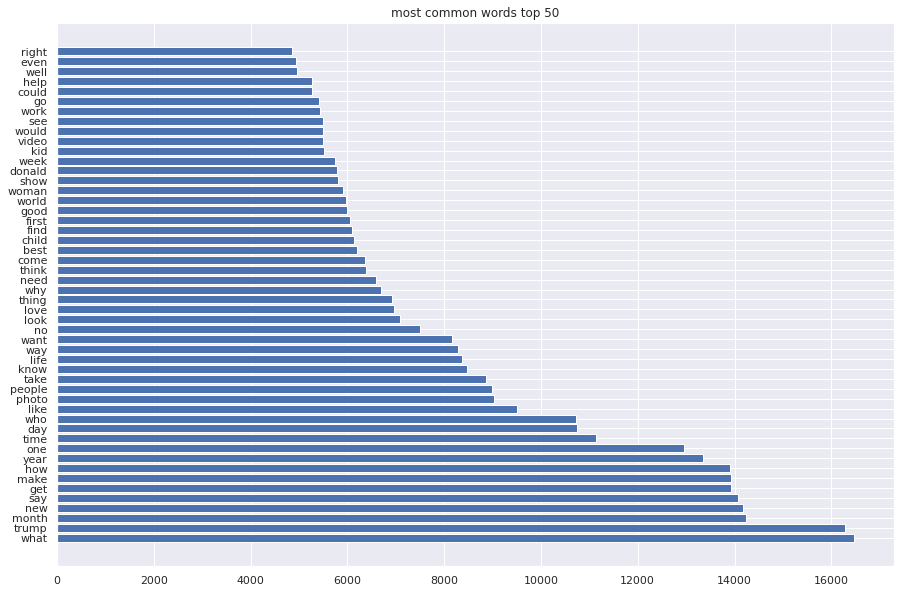

In [21]:
all_words = [w for row in df['text'] for w in row.split()]

all_words_freq = pd.DataFrame(FreqDist(all_words).items(), columns=['key', 'value']).sort_values('value', ascending=False)[:50]
plt.figure(figsize=(15, 10))
plt.title('most common words top 50')
plt.barh(all_words_freq['key'], all_words_freq['value'])

---

# 3.2- Frequency of the Most Common Words for Every Class

We will plot the most frequent words for every class. If there is no visualisation, then the class does not has special words that just ocurr for it.

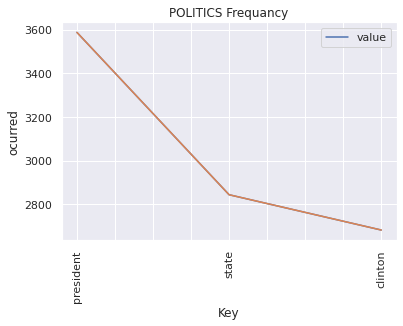

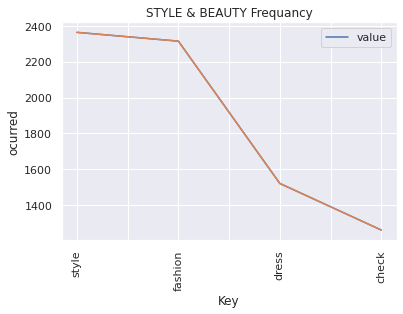

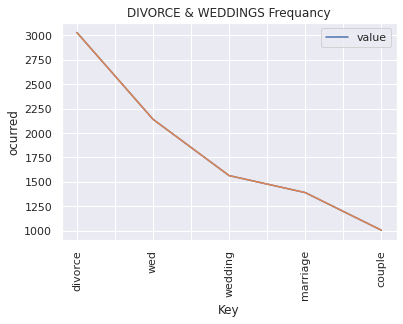

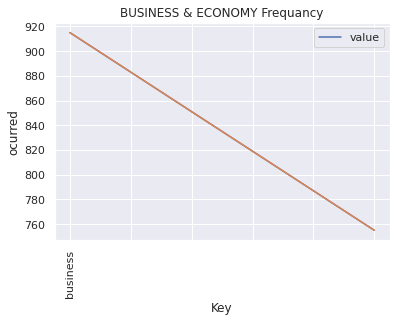

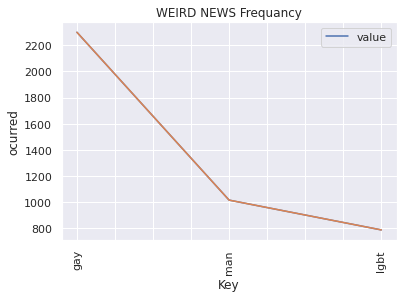

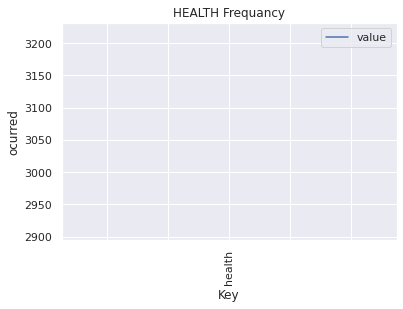

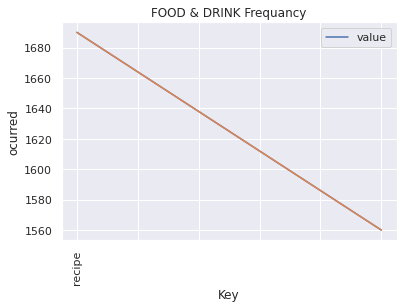

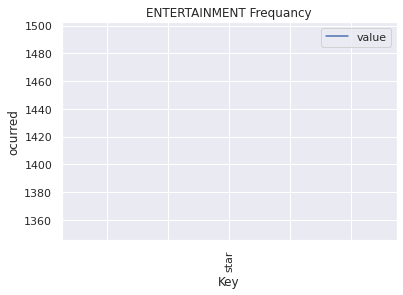

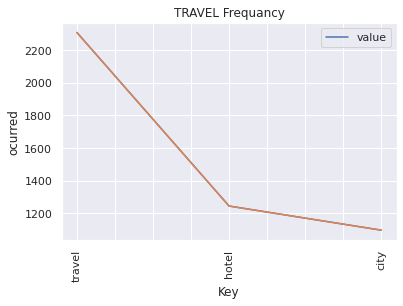

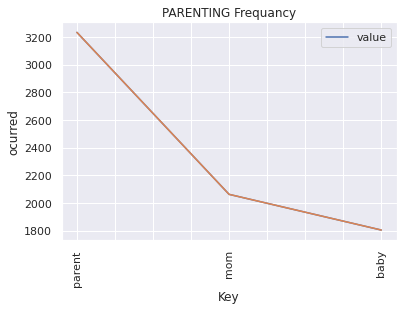

In [22]:
all_words = [w for row in df['text'] for w in row.split()]

all_words_freq = pd.DataFrame(FreqDist(all_words).items(), columns=['key', 'value']).sort_values('value',
                                                                                                 ascending=False)[:50]
all_words_freq = all_words_freq.set_index(all_words_freq['key']).drop('key', axis=1)

for category in df['category'].unique():
    freq = extract_most_common(df, category, 'category', 'text')
    category_freq = remove_words_if_in_remove_list(freq, all_words_freq)
    category_freq.plot()

    plt.title(f'{category} Frequancy')
    plt.xlabel('Key')
    plt.ylabel('ocurred')
    plt.xticks(rotation=90)
    plt.plot(category_freq)

If we examined the plots we will notice that for every category there is special words (e.g. 'trump' will be the most common word in 'Politics' category)
occurring frequntly. So we will take these words and keep it as FEATURES for training later in the *Feature engineering* section.

---

# 3.3- The Average, Maximum and Minimum Length of the News Text

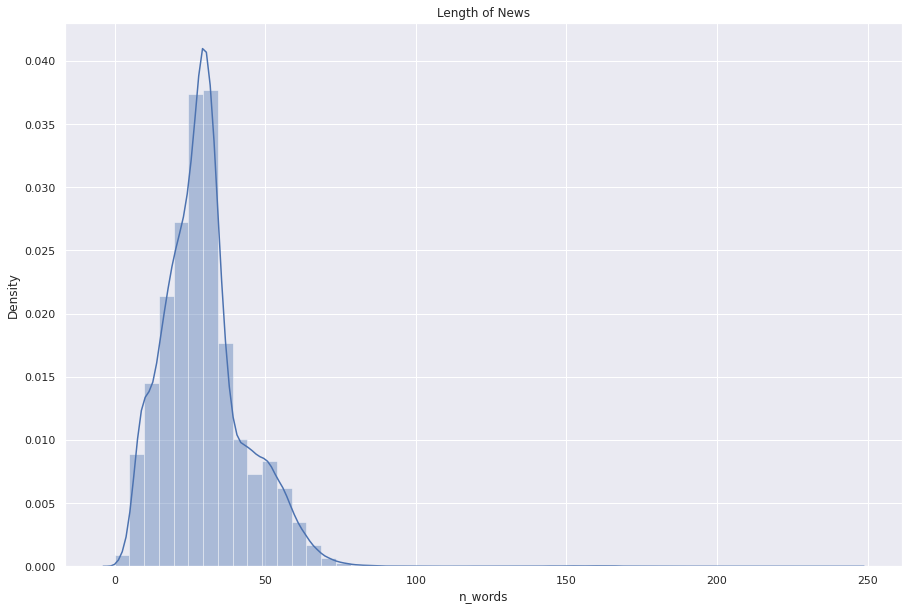

min length:  0
max length:  245
mean length:  29.645608201717927


In [23]:
plt.figure(figsize=(15, 10))
sb.distplot(df['n_words'])

plt.title('Length of News')
plt.show()
print('min length: ', df['n_words'].min())
print('max length: ', df['n_words'].max())
print('mean length: ', df['n_words'].mean())

---

# 3.4- Plotting the Distribution of the Extracted Features(lexicon) among the classes

Here we will notice that there are some classes effected by these features:

Number of lower letters

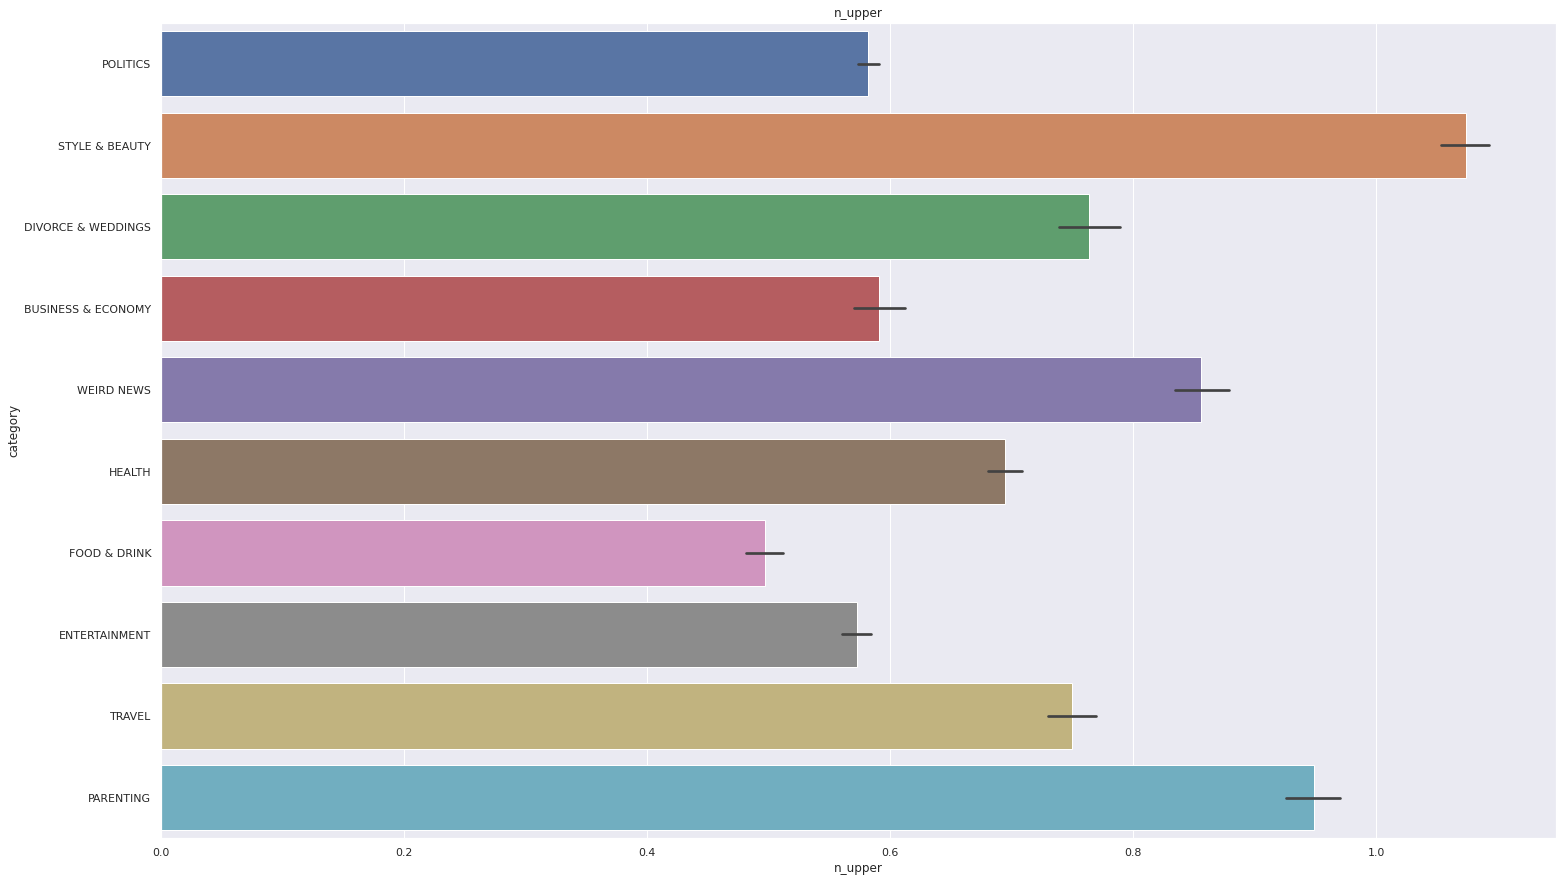

In [24]:
plt.figure(figsize=(25, 15))
plt.title('n_upper')
sb.barplot(df['n_upper'], df['category'])

Number of lower letters

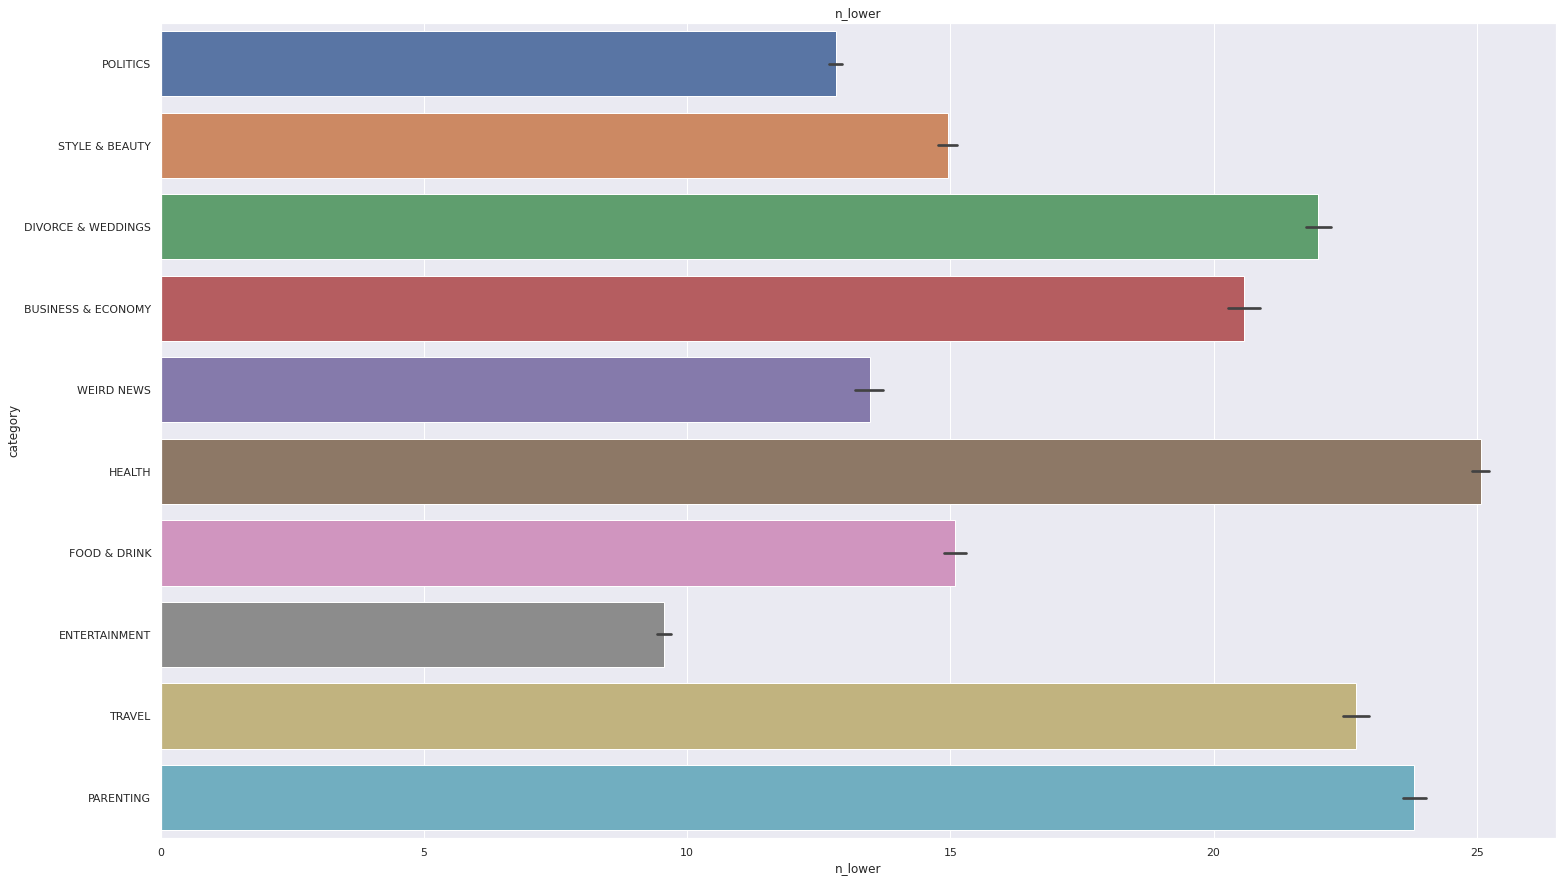

In [25]:
plt.figure(figsize=(25, 15))
plt.title('n_lower')
sb.barplot(df['n_lower'], df['category'])

Number of digits characters

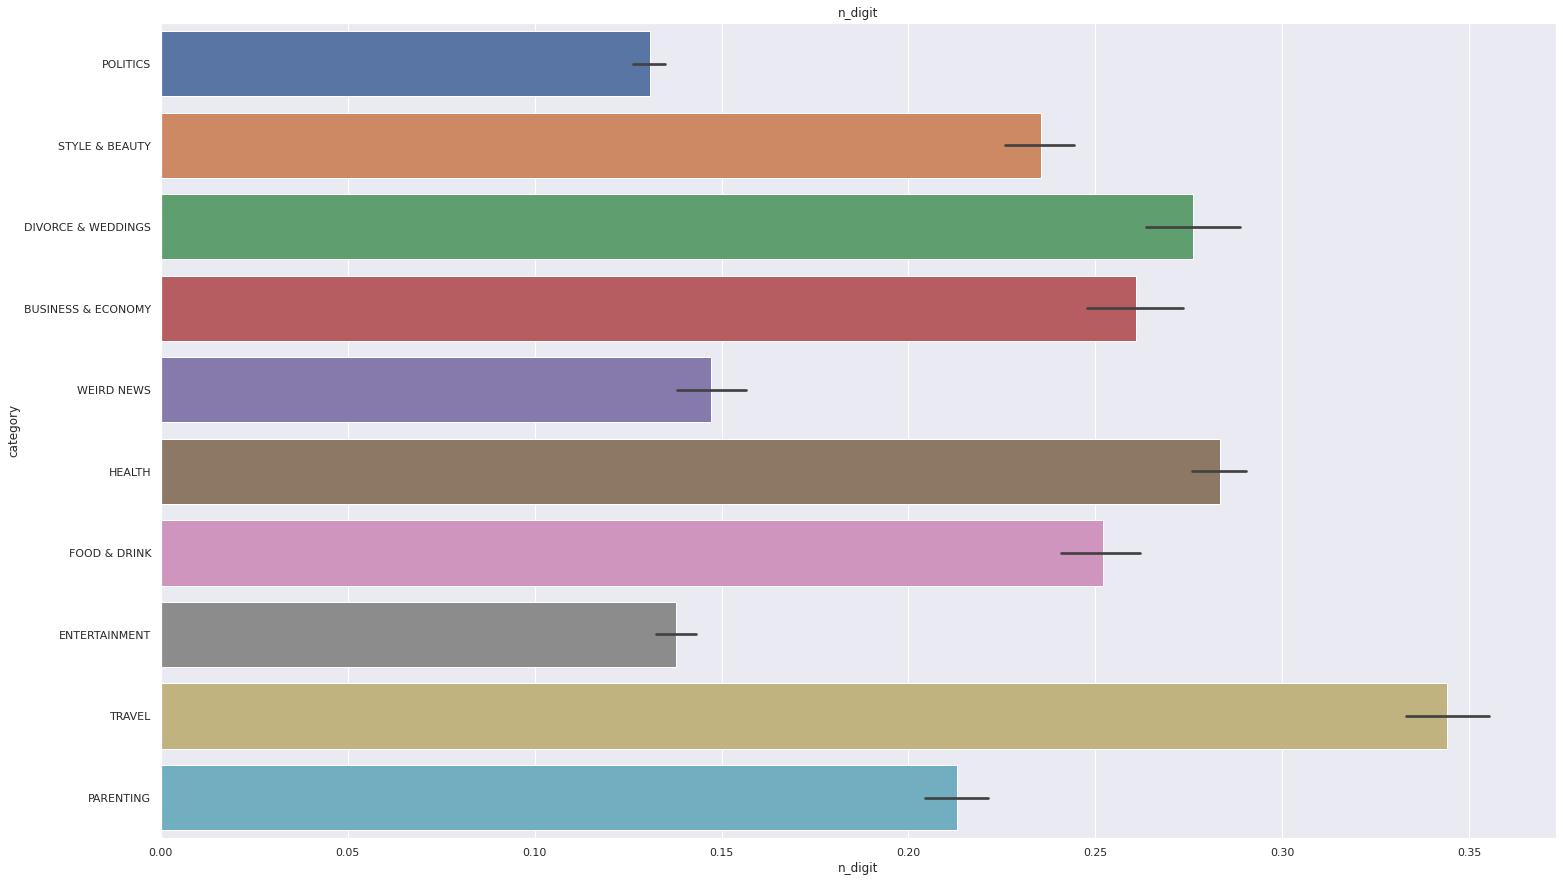

In [26]:
plt.figure(figsize=(25, 15))
plt.title('n_digit')
sb.barplot(df['n_digit'], df['category'])

Number of title letters

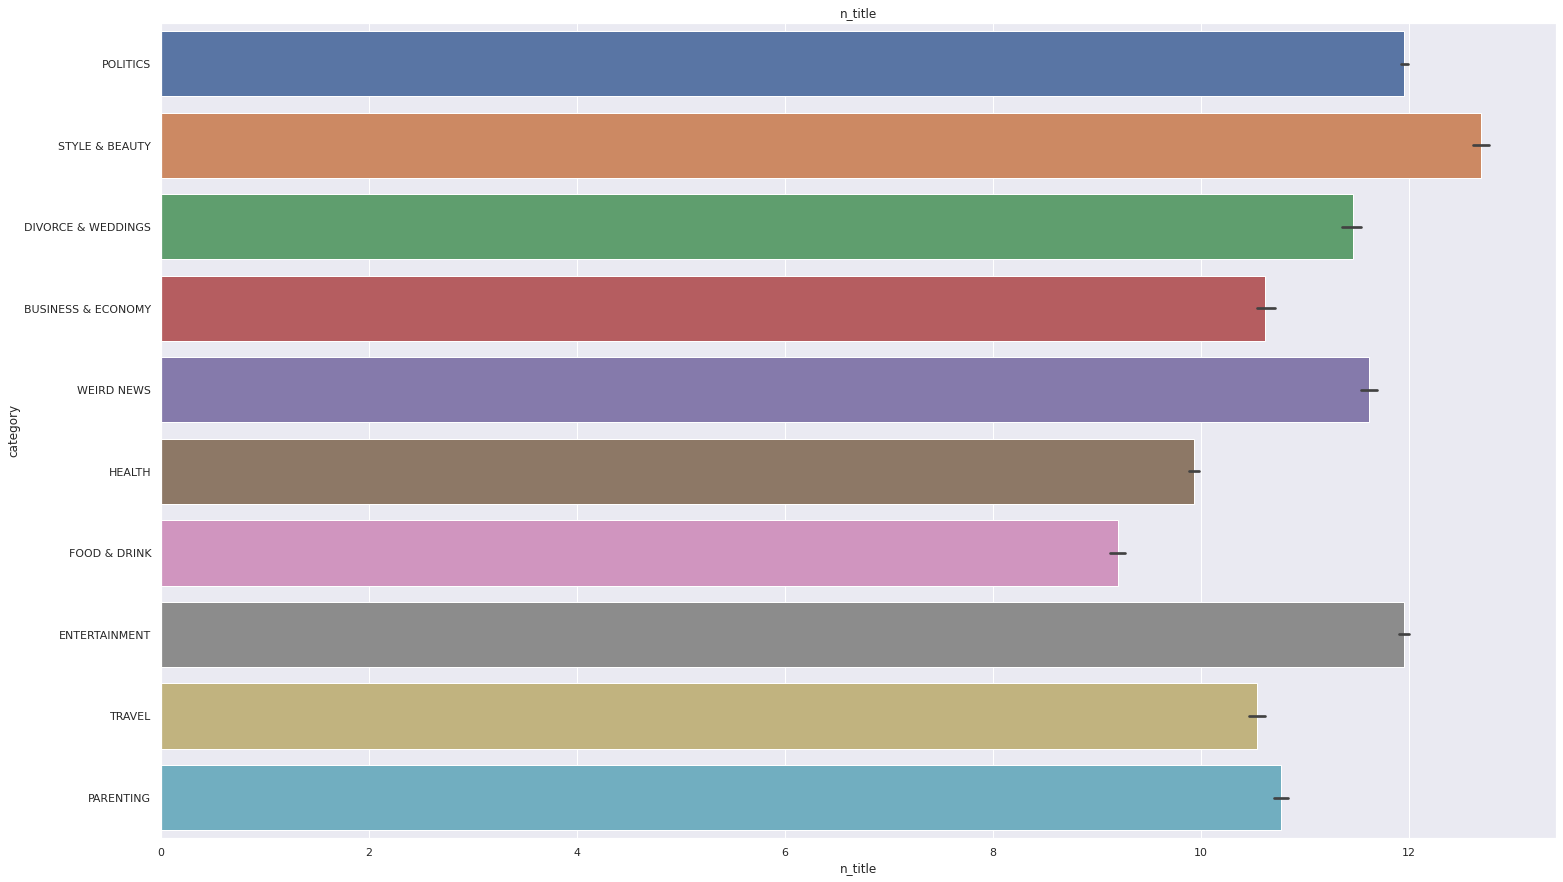

In [27]:
plt.figure(figsize=(25, 15))
plt.title('n_title')
sb.barplot(df['n_title'], df['category'])

Number of special characters

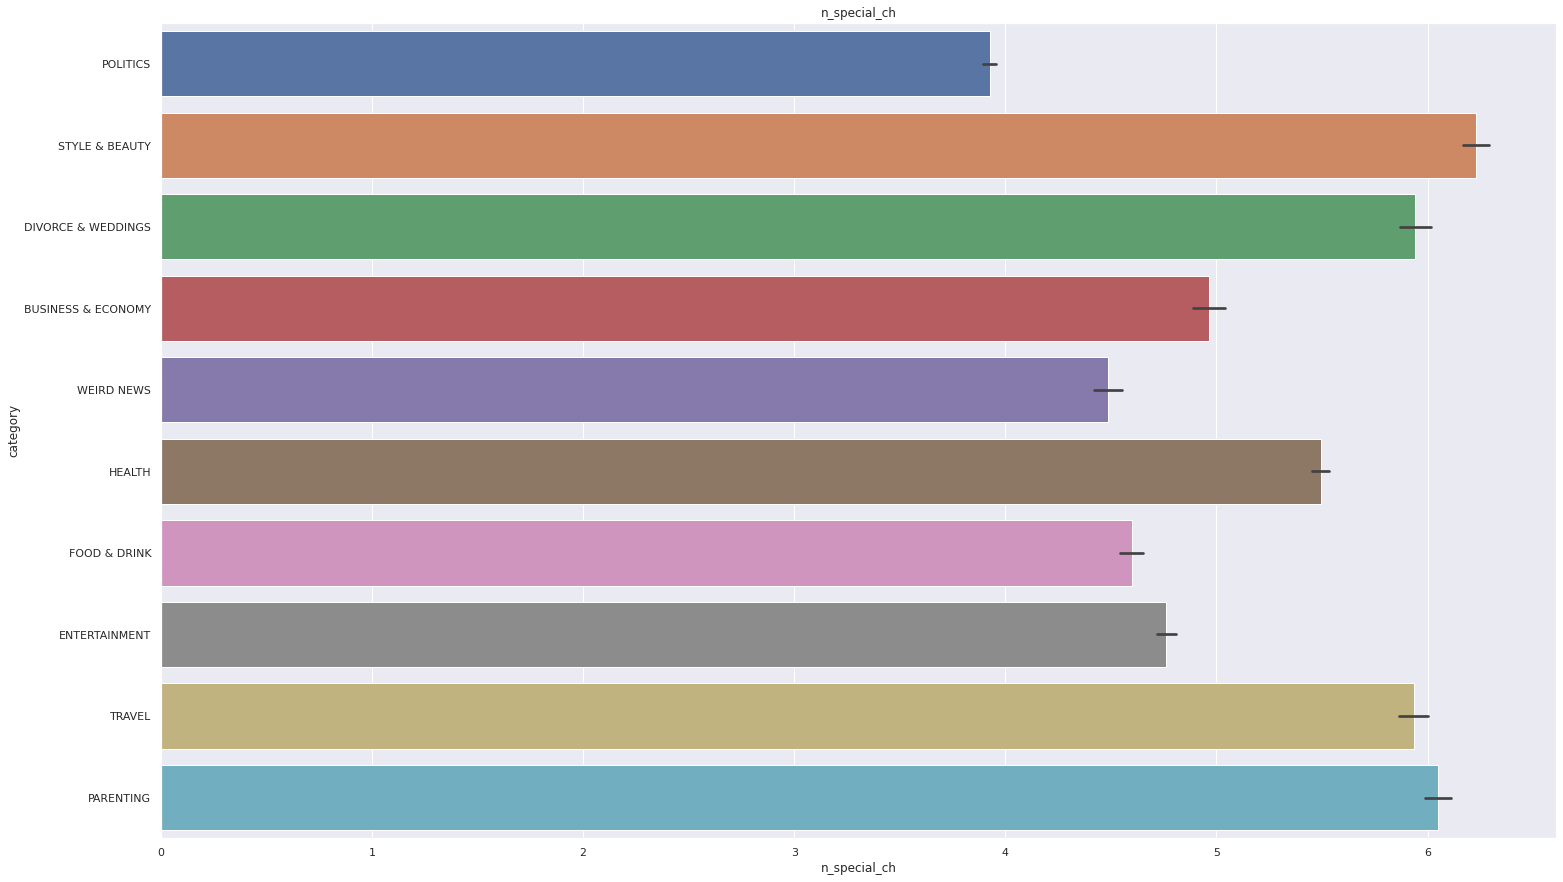

In [28]:
plt.figure(figsize=(25, 15))
plt.title('n_special_ch')
sb.barplot(df['n_special_ch'], df['category'])

Number of words

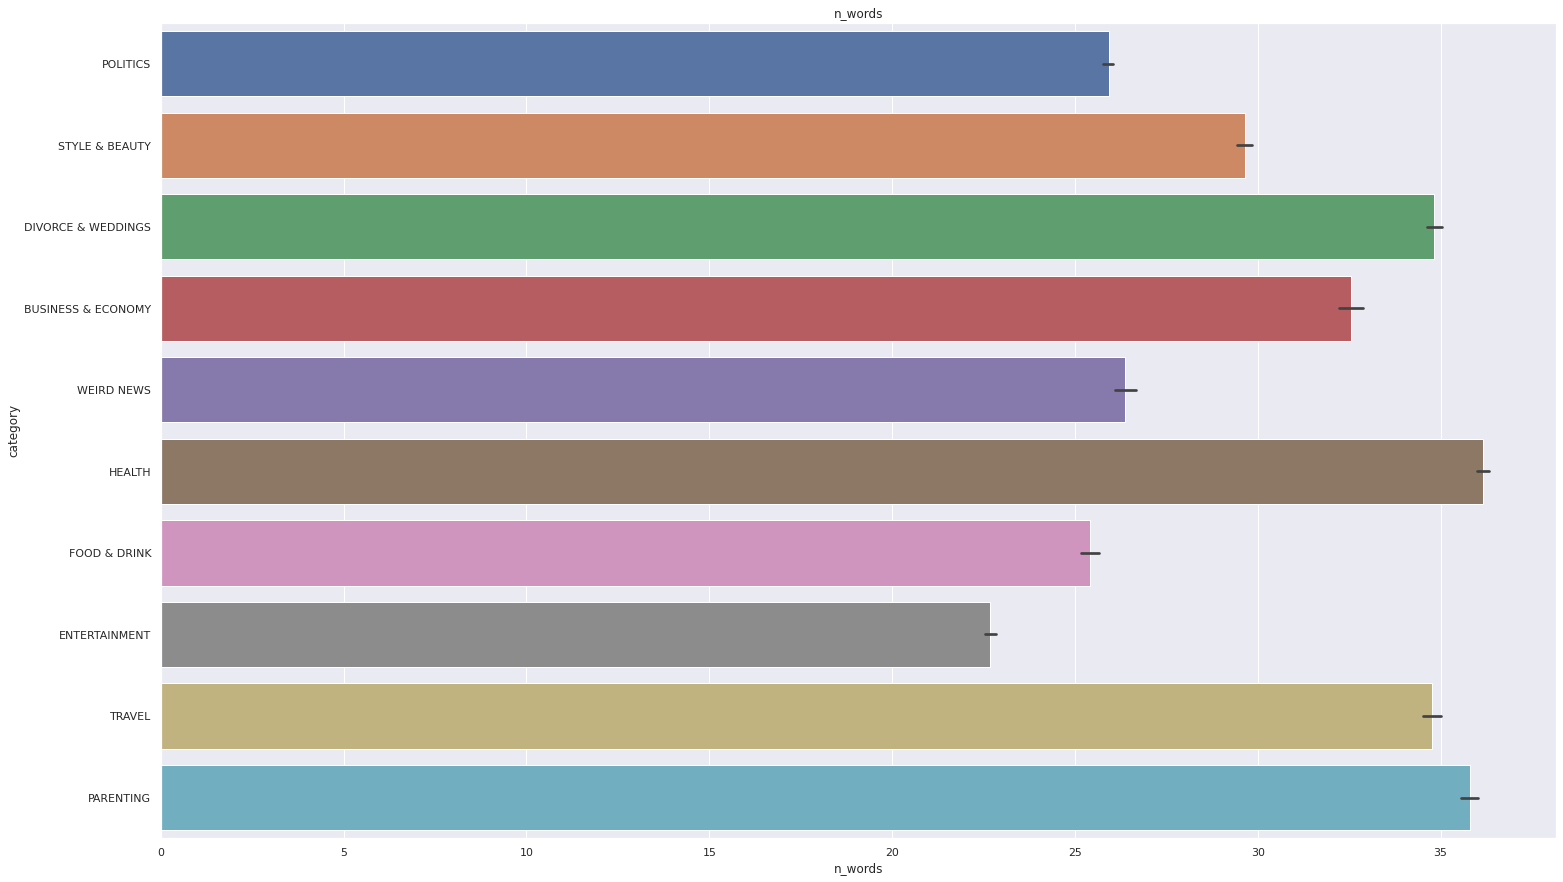

In [29]:
plt.figure(figsize=(25, 15))

plt.title('n_words')
sb.barplot(df['n_words'], df['category'])

---

# 4- Data Preparation

If you are not familiar with using Dataset and Dataloader classes in Pytorch, I will recommend first checking out this [post](https://medium.com/swlh/how-to-use-pytorch-dataloaders-to-work-with-enormously-large-text-files-bbd672e955a0) which gives an overview of these APIs. In short, a Dataset class provides a method to sample data from a given dataset and a Dataloader object calls this method repeatedly to iterate through the dataset. The dataset class in our problem will look like

# 4.1- Split Data

We will split data to three sets: train, validation and test sets.

Train set will be used to train models and tune there parameters.

Validation set will be used to evaluate models, and its scores will be important to know if the models accuracies still increase; if not, we will stop it using Early Stopping.

Test set will be the last section that will determine the accuracies of the models, and these scores will be used when we will analyze all models performances.

In [30]:
train_set, test_set = train_test_split(df, test_size=.1, random_state=42)
val_set, test_set = train_test_split(test_set, test_size=.5, random_state=42)
print(f'Train set length: {len(train_set)} ; categories: {train_set["category"].nunique()}')
print(f'Val set length: {len(val_set)} ; categories: {val_set["category"].nunique()}')
print(f'Test set length: {len(test_set)} ; categories: {test_set["category"].nunique()}')

Train set length: 133172 ; categories: 10
Val set length: 7398 ; categories: 10
Test set length: 7399 ; categories: 10


Let's see how many vocabs that are not in our vocabs

---
# 4.2- Prepare Text: split text , drop non-frequent words(e.g. occurred 3 times), create word2index and index2word for converting text to numbers(index)

Our vocabs will be from train set vocabs and validation set vocabs. Although 'val_set' data will not train the model representaions for a word, when we extract the vectors representaions of a pre-trained Embedding, we can extract the vectors for 'val_set'vocabs and avoid OOV(out of vocabulary) probelm.

So we will have more words with vectors representaions.

We will drop any word that ocurred less then 3 times.

In [31]:
def prepare_text_dict(text, min_freq=3):
    # split text
    all_words = [w for row in text for w in row.split()]

    # the frequencies of words in text
    freq = FreqDist(all_words)
    clean_words = []

    # drop words occurred less min_freq
    for row in text:
        for word in row.split():
            if freq[word] > min_freq:
                clean_words.append(word)
        
    # vocabs set
    clean_words = set(clean_words)
    # convert words to indexes
    word2index = {w: i for i, w in enumerate(clean_words, 2)}  # start at 2
    word2index['<pad>'] = 1
    word2index['<unk>'] = 0

    # convert indexes to words
    index2word = {i: w for i, w in enumerate(clean_words, 2)}  # start at 2
    index2word[1] = '<pad>'
    index2word[0] = '<unk>'
    
    del freq, clean_words # just to save some RAM memory
    
    return word2index, index2word
# process text dict
text = pd.concat([train_set['text'], val_set['text']], axis=0)
word2index, index2word = prepare_text_dict(text) # notice that we are won't use the 'test_set' vocabs

print('Total vocabs ', len(word2index))

Total vocabs  23700


---

# 4.3- Convert Categories to Index

In [32]:
# create dict for labels
unique_classes = df['category'].unique()

encoding2label = dict(enumerate(unique_classes))  # for every class there is a number. starting from 0. same as {0: 'politics', 1: 'sport', 2: 'parenting' ...}

label2encoding = {value: key for key, value in encoding2label.items()} # the oppsite of {'politics': 0,  'sport': 1, 'parenting': 2 ...} 

features_cols = df.drop(['text', 'category'], axis=1).columns # names of pca components' columns, we will use this list to extract the features we want to train with text later

---

# 4.4- Create Data Class (for pytorch API)

We will feed our networks with *text* and the *features* we created above.

We will also sort the texts by their length so we can decrease the amount of padding and make training fast. For example if there is batch with texts of the following lengths 10,13 and 55. We need to pad them equaly to 55. But when we sort them, the text of length 55 will be batched with texts of similar length.

And inside the __getitem__ attribute will be the indexing of the text. But padding will be in *collate function* which is a function that tells in which shape we want *DataLoader* to get the data (*collate function* is used to modify the data during the batch, the only thing we will use it for is to pad the sequence by batch max_length).

We created one class for all the model except BERT model, because BERT model need a special way to process the data by BertTokenizer, and has its own vocabs dictionary, so we will create a function for it. It's similar to *Data* class, just a little difference.

In [33]:
# Dataset class
class Data(data.Dataset):
    def __init__(self, df, word2index, label2encoding):
        self.word2index = word2index # to index text

        # sort text by length of total words
        df['length'] = df['text'].apply(lambda x: len(x.split()))
        df.sort_values(by='length', inplace=True)

        # prepare data
        self.target = df['category'].apply(lambda x: label2encoding[x]).values
        self.text = df['text'].apply(lambda x: x.split()).values
        self.features = df.loc[:, features_cols].values

    def __len__(self):
        return len(self.target)

    def __getitem__(self, item):
        sequence = [self.word2index[w] for w in self.text[item] if w in self.word2index]
        features = self.features[item]
        target = self.target[item]

        return {'target': target, 'features': features, 'sequence': sequence}


def Bert_data(df, label2encoding):
    # sort text by length of words
    df['length'] = df['text'].apply(lambda x: len(x.split()))
    df.sort_values(by='length', inplace=True)
    target_uniques = df['category'].nunique()

     # prepare data
    target = df['category'].apply(lambda x: label2encoding[x]).values
    text = df['text'] # the BertTokenizer will index them so we don't need for word2index
    features = df.loc[:, features_cols].values

    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    x_encoded = tokenizer.batch_encode_plus(text, pad_to_max_length=True)
    
    input_ids = torch.tensor(x_encoded['input_ids'],  device=device, dtype=torch.long)
    attention_mask = torch.tensor(x_encoded["attention_mask"],  device=device, dtype=torch.long) # to mark the text; if it was not a padding index,1 else 0
    target = torch.tensor(target,  device=device, dtype=torch.long)
    features = torch.tensor(features, device=device, dtype=torch.float)
    
    return data.TensorDataset(input_ids, attention_mask, features, target)

train_data = Data(train_set, word2index, label2encoding)
val_data = Data(val_set, word2index, label2encoding)
test_data = Data(test_set, word2index, label2encoding)

bert_train_data = Bert_data(train_set, label2encoding)
bert_val_data = Bert_data(val_set, label2encoding)
bert_test_data = Bert_data(test_set, label2encoding)

---

# 4.5- Create collate_fn to PAD Sorted Text by Length

We will create a padding function, and the collate function to pad the batches to the highes text length in the batch , instead of pading the hole data to the highest length in it.

In [34]:
# pad text
# you can use any padding function instead of this, don't worry if it's hard to understand,
# it's like any padding function but with less code :)
def pad_text(list_text, seq_length):
    paded_text = []
    for text in list_text:

        if len(text) == seq_length:
            paded_text.append(text)
        else:
            paded_text.append(text + (seq_length - len(text)) * [1]) # '1' is the index for 'PAD' in vocabs dict

    return paded_text


def collate_fn_padded(batch):
    target = [b['target'] for b in batch]
    features = [b['features'] for b in batch]
    sequence = [b['sequence'] for b in batch]

    # extract max_length
    max_length = max([len(b) for b in sequence])
    
    # pad text
    sequence = pad_text(sequence, max_length)

    # convert list to torch.tensor
    return {'target': torch.tensor(target, device=device, dtype=torch.long),
            'features': torch.tensor(features, device=device, dtype=torch.float),
            'sequence': torch.tensor(sequence, device=device, dtype=torch.long)
            }

---
# 4.6- Use *DataLoader* to Batch the Data (and use collate_fn to pad the batch by length)

We will take set 'batch_size=12'for BERT model, because it's a huge model and the authors of BERT recommend batch to be like [8, 16, 32, 64],
and 'batch_size=32' for all other models.

In [35]:
train_loader = data.DataLoader(train_data, batch_size=32, collate_fn=collate_fn_padded)
val_loader = data.DataLoader(val_data, batch_size=32, collate_fn=collate_fn_padded)
test_loader = data.DataLoader(test_data, batch_size=32, collate_fn=collate_fn_padded)

bert_train_loader = data.DataLoader(bert_train_data, batch_size=12)
bert_val_loader = data.DataLoader(bert_val_data, batch_size=12)
bert_test_loader = data.DataLoader(bert_test_data, batch_size=12)

---
# 5- Load and Combine Multiple Pre-Trained Embeddings

# 5.1- What is Word Embedding

In [36]:
# --- word embedding files --- #
vocab = word2index

# every embedding file is of format '.txt', and every line contains the word as the first vlaue and the embedding vector as the rest of the values.
# since the embeddings was trained on millions of words, there will be alot of lines, but we want just the embeddings of our vocabs 

# tweeter embeddings
tweeter_embeddings = {}
print('\ntweeter embeddings...')

with open('/content/drive/MyDrive/Colab Notebooks/Kaggle/News-Category/dataset/glove.twitter.27B.50d.txt', 'r') as f:
    for line in f.readlines():
        vector = line.split() # split by 'space'

        word = vector[0] # word
        dims = vector[1:] # embedding vector
        if word in vocab.keys():  # if word is in our vocabs: 
            tweeter_embeddings[word] = pp.array(dims) # assign 'word' to its vector embedding in 'tweeter_embeddings' dict

missing = len(word2index) - len(tweeter_embeddings)

print(f'tweeter embeddings found for our vocabs: {len(tweeter_embeddings)} | missing: {missing} ; {missing / len(word2index) * 100:.1f}%')

# glove embeddings
print('\nglove embeddings...')
glove_embeddings = {}
with open('/content/drive/MyDrive/Colab Notebooks/Kaggle/News-Category/dataset/glove.6B.50d.txt', 'r') as f:
    for line in f.readlines():
        vector = line.split()  # split by 'space'

        word = vector[0] # word
        dims = vector[1:] # embedding vector
        if word in vocab.keys(): # if word is in our vocabs: 
            glove_embeddings[word] = pp.array(dims) # assign 'word' to its vector embedding in 'tweeter_embeddings' dict

missing = len(word2index) - len(glove_embeddings)
print(f'glove embeddings found for our vocabs: {len(glove_embeddings)} | missing: {missing} ; {missing / len(word2index) * 100:.1f}%')

print('total words of our vocabs: ', len(word2index))


tweeter embeddings...
tweeter embeddings found for our vocabs: 22949 | missing: 751 ; 3.2%

glove embeddings...
glove embeddings found for our vocabs: 23144 | missing: 556 ; 2.3%
total words of our vocabs:  23700


---
# 5.5- Concatenate Embeddings

We will Combine both embeddings.

In [37]:
# --- concatenate embeddings --- #

d = pd.DataFrame(pd.concat([pd.DataFrame(tweeter_embeddings), pd.DataFrame(glove_embeddings)], axis=0, join='inner'))
# 'inner' mean to not add any word embedding that does not contains dimentions from both files embeddings

combined_embedding = {}

for col in d.columns:
    combined_embedding[col] = d[col].values

---

# 5.6- Create Embedding Matrix

We must create a look-up table so an Embedding layer can map the index of the words to their vectors representations.

For OOV words, instead of creating an array full of zeros (no correlation with any word), it's recommended for 
any word that has no vector representation be an array of random numbers between -0.25 and 0.25 (random correlation).

In [38]:
# --- embedding matrix --- #

# we will give any word that has no embeddings a 100-dimension full of random numbers between -0.25 and 0.25
for word in vocab:
    if word not in combined_embedding.keys():
        combined_embedding[word] = pp.random.uniform(-0.25, 0.25, 100)  # 50d + 50d = 100d

# create Look-Up table
def create_embedding_matrix(word_index, embedding_dict, dimension):
    embedding_matrix = pp.zeros((len(vocab) + 1, dimension)) # (len_vocab, 100)

    for word, index in word_index.items():
        if word in embedding_dict:
            embedding_matrix[index] = embedding_dict[word]

    return embedding_matrix

embedding_matrix = create_embedding_matrix(vocab, combined_embedding, 100)

---

# 6- Model Archtectures

---

# 6.1- Long Short-Term Memory (LSTM)


In [39]:
class LSTM_Model(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, n_layers, output_size, p=.5, use_features=False,
                 features_size=None):

        super().__init__()  # This is needed to initialize the nn.Module properly

        # 'use_features' if used, we supposed to give text and feature data to the model to make prediction.
        # create 'use_features' as 'self.use_features' so we can use it in the hole class functions(e.g. 'forward') instead of just in '__init__' attrbute
        self.use_features = use_features

        # 'Embedding' layer works like a lookup table(dictionary). The words are the keys in this table, while the dense word vectors are the values.
        self.Embedding = nn.Embedding(vocab_size, embedding_dim)

        # LSTM is the Long Short-Term Memory layer that will take the vectors represntations and extract the semantics/hidden_states
        self.LSTM = nn.LSTM(embedding_dim, hidden_size, num_layers=n_layers, bidirectional=False, batch_first=True, dropout=p)
        # if 'batch_first=True' 'hidden' shape will be (num_layers * num_directions, batch, hidden_size)
        # if 'batch_first=False' 'hidden' shape will be (num_layers * num_directions, seq_len, hidden_size)
        

        # A Dense/Linear layer that learn from last_hidden_state (optional layer; you can remove it)
        self.Linear = nn.Linear(hidden_size, hidden_size)

        # Dropout layer that help regularizing and prevent overfitting (optional layer)
        # It randomly zeroes some of the elements of the input tensor with probability 'p'
        self.Dropout = nn.Dropout(p)

        # Dense/Linear layer to predict the class of the text/sequence
        self.output = nn.Linear(hidden_size, output_size)

        # add these layers if 'use_features'
        if self.use_features:
            # this dense layer will take the features and tune its parameters
            self.f_Linear = nn.Linear(features_size, hidden_size)

            # this dense layer will take the output from 'f_Linear' and predict the class of the text/sequence
            self.f_output = nn.Linear(hidden_size, output_size)

    def forward(self, x, features=None):  # run the network

        Embedding = self.Embedding(x)  # map the words to their vectors representations by the Embedding layer

        output, (hidden, cell) = self.LSTM(Embedding)  # calculate the sequence/text sementics
        # 'output' comprises all the hidden states in the last layer
        # (hidden, cell) comprises the hidden states after the last timestep

        # 'cell' state contains info about wether to keep a hidden state or no (num_layers * num_directions, batch, hidden_size)
        # 'output' state is a tensor of all the 'hidden' states from each time step  (seq_len, batch, num_directions * hidden_size)
        # 'hidden' state is the hidden states from the last time step  (num_layers * num_directions, batch, hidden_size) 

        last_hidden_state = hidden[-1, :, :]  # last hidden state from the last time step (seq_len, hidden_size)

        x = nn.functional.leaky_relu(self.Linear(last_hidden_state), .001)
        # 'leaky_relu' is similar to relu activation function, it just let the values to be between '0.001' and any other number

        x = self.Dropout(x)  # apply dropout

        # combine the outputs of text and features if 'use_features' is 'True'.
        # we will multiply each output by 0.5 to get half the original weights, and then combine the two halves
        # to have a predictions from both outputs weights.
        if self.use_features:

            x = self.output(x) * 0.5  # half the weights

            x_2 = nn.functional.leaky_relu(self.f_Linear(features), .001)
            x_2 = self.f_output(x_2) * 0.5  # half the weights

            final_x = x + x_2  # combine the two halves outputs

            return final_x

        else:
            return self.output(x)  # if 'use_features' is 'False' then 'features' output won't be calculated

---

# 6.2- Bidirectional LSTM (BiLSTM)



In [40]:
# BI-LSTM
class BiLSTM_Model(nn.Module):

    def __init__(self, vocab_size, embedding_dim, hidden_size, n_layers, output_size, p=.5, use_features=False,features_size=None):
        super().__init__()
        self.use_features = use_features
        self.Embedding = nn.Embedding(vocab_size, embedding_dim)
        
        # if we make 'bidirectional'='True', we will
        self.LSTM = nn.LSTM(embedding_dim, hidden_size, num_layers=n_layers, bidirectional=True, batch_first=True, dropout=p)
        self.Linear = nn.Linear(hidden_size * 2, hidden_size) # 'hidden_size * 2' because we will concatenate last two hidden states
        self.Dropout = nn.Dropout(p)
        self.output = nn.Linear(hidden_size, output_size)

        if self.use_features:
            self.f_Linear = nn.Linear(features_size, hidden_size)
            self.f_output = nn.Linear(hidden_size, output_size)

    def forward(self, x, features=None):
        Embedding = self.Embedding(x)
        output, (hidden, cell) = self.LSTM(Embedding)

        hidden = torch.cat([hidden[-2, :, :], hidden[-1, :, :]], dim=1) # concatenate left and right context
        
        x = nn.functional.leaky_relu(self.Linear(hidden), .001)
        x = self.Dropout(x)
        
        if self.use_features:
            x = self.output(x) * 0.5

            x_2 = nn.functional.leaky_relu(self.f_Linear(features), .001)
            x_2 = self.f_output(x_2) * 0.5

            final_x = x + x_2
            return final_x
        else:
            return self.output(x)

---

# 6.3- Convolutional Neural Network (CNN)


In [41]:
class CNN_Model(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_size, p=.5, use_features=False,
                 features_size=None):
        super().__init__()
        self.use_features = use_features
        self.Embedding = nn.Embedding(vocab_size, embedding_dim)

        # we will build 'Conv2d' layers as much as the amount of 'filter_sizes' list
        # the 'kernel_size' will be (filter_size, embedding_dim),
        # 'filter_size' is the number words to take as 'n-gram'
        # 'embedding_dim' is the vector representation for the word (Embedding dimentions)
        # 'ModuleList' helps in creating more then one layer at once
        self.convs = nn.ModuleList(nn.Conv2d(1, n_filters, (ks, embedding_dim)) for ks in filter_sizes)  # 'convs' will be as much as 'filter_sizes' list

        # note: There is no hidden layer between 'convs' layers and 'output' layer


        # we will concatenate all 'convs' layers outputs and feed them to the 'output' layer
        self.output = nn.Linear(len(filter_sizes) * n_filters, output_size)

        self.Dropout = nn.Dropout(p)

        if self.use_features:
            self.f_Linear = nn.Linear(features_size, hidden_size)
            self.f_output = nn.Linear(hidden_size, output_size)

    def forward(self, x, features=None):
        # the 'Conv2d layer' wants inputs of shape (batch, Channel, Height, Width)
        # our text is of shape(batch, seq_lens)

        # after feeding text to the 'Embedding' layer, we will have shape(batch, seq_lens, embedding_dim)
        Embedding = self.Embedding(x)

        # the convolutional layer wants the inputs to be of
        # shape(batch,  Channel, Height, Width) and the 'Embedding' layer's output is shape(batch, seq_lens, embedding_dim)
        # to make 'Embedding' output correct to feed a 'convs' layer, its shape must be same as the shape of a conv layer.

        # the batch in conv shape exist in 'Embedding' shape.
        # the Channel in conv shape will be the number of embedding layers; in our case it's 1 'Embedding' layer.
        # the Height in conv shape  will be the 'seq_lens'(num words or n-gram)
        # the Width in conv shape  will be the 'embedding_dim'(vector representation of a word)

        # conv(batch, Channel, Height, Width) = Embedding(batch, num_embeddings, seq_lens, embedding_dim)
        Embedding = Embedding.unsqueeze(1) # create Channel dimension

        convs = [F.relu(c(Embedding)).squeeze(3) for c in self.convs]
        # after applying a conv layer, the output will be of shape (batch, Height, Width, Channel)
        # the 'max_pool1d' layer doesn't want the channel dimension(third dim), so we will remove/squeeze it by using .squeeze(3)

        convs = [F.max_pool1d(c, c.shape[2]).squeeze(2) for c in convs]
        # the kernel_size is the word embedding_dim (c.shape[2]; which is the Width dimension(second dim) ).
        # since the Width dimension (c.shape[2]) is pooled, the second dimension is empty.
        # so we will remove/squeeze it by using .squeeze(2)

        # we will concatenate all 'convs' outputs (note that 'convs' is a list of all 'convs' layers
        # outputs; e.g. [conv1, conv2, ...])

        # the shape is, 'batch_size' and the sum of all the filters of all 'convs'
        # layers (e.g. n_filter1 + n_filter2 ..., depending on how many conv layer there)
        total_pools = torch.cat(convs, dim=1)  # (batch, total_filters)

        x = self.Dropout(total_pools)

        if self.use_features:
            x = self.output(x) * 0.5
            x_2 = nn.functional.leaky_relu(self.f_Linear(features), .001)
            x_2 = self.f_output(x_2) * 0.5
            final_x = x + x_2
            return final_x
        else:
            return self.output(x)


# We have to build a function that pad tha sequences that are less then the filter size
# The model will throw an error if a sentence/sequence is less then the kernel_size of certain conv, so we must pad it
# to the maximum size of kernel_size.
def cnn_padding_to_match_filtersize(text):
    features_ = []
    for f in text:
        f = f.cpu().numpy().tolist()
        if len(f) < max(filter_sizes):
            f += [1] * (max(filter_sizes) - len(f))
            features_.append(f)
        else:
            features_.append(f)

    return torch.LongTensor(features_).to(device)

---

# 6.4- Recurrent Convolutional Neural Networks (RCNN)


In [42]:

# BI-LSTM all hidden_state concatenated
class RCNN_Model(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, n_layers, output_size, p=.5, use_features=False,
                 features_size=None):
        super().__init__()

        self.use_features = use_features
        self.Embedding = nn.Embedding(vocab_size, embedding_dim)
        self.LSTM = nn.LSTM(embedding_dim, hidden_size, num_layers=n_layers, dropout=p, bidirectional=True,
                            batch_first=True)
        # because the concatenated contexts will be pooled as in the paper, it's not recommended to put a hidden dense layer.
        # (if you will, it's better to make its 'input' and 'output' shapes as the shape of the concatenated contexts)
        self.Linear = nn.Linear(2 * hidden_size + embedding_dim, 2 * hidden_size + embedding_dim)

        self.output = nn.Linear(2 * hidden_size + embedding_dim, output_size)
        # 'output' input shape is:
        # (2 * hidden_size + embedding_dim), '2 * hidden_size' is just because the inputs will be of shape
        # (batch, left_context_h_state * embedding_dim * right_context_h_state)
        # both 'left_context_h_state' and 'right_context_h_state' have same 'hidden_size', (because bi-lstm is of two directions
        # with the same hidden size), when they are together, they will be of hidden size: 2 * hidden_size

        if self.use_features:
            # here we just changed the 'input' shape of the last layer, (because we didn't create any hidden layer
            # above, like in the other models)
            self.f_Linear = nn.Linear(features_size, 2 * hidden_size + embedding_dim)
            self.f_output = nn.Linear(2 * hidden_size + embedding_dim, output_size)

    def forward(self, x, features=None):
        # x shape (batch, seq_lens)
        inputs = self.Embedding(x)  # (batch, seq_lens, embedding_dim)

        output, (hidden_state, cell_state) = self.LSTM(inputs)
        # 'output' shape (batch, seq_len, num_directions * hidden_size)

        # the hidden state values when bilstm 'bidirectional is True', will be like this [left_direction, right_direction].

        # the 'output' contain all hidden states of both directions. so if we want to extract all the left_context(original direction)
        # hidden states, we need to extract every 'first hidden' value(by skipping 'right_direction' in [left_direction, right_direction])

        # # output[:, :, ::2] '2' here means take every 'second' index starting from 0
        # example: | left|     right|       left|     right|  left|
        #          |    0|         1|          2|         3|     4|
        #          |start|     first|     second|     first|second|
        #          | take|don't take|       take|don't take|  take|
        left_context = output[:, :, ::2]  # ('batch', 'seq_len', hidden_size)

        # and if we want to extract the right_context(opposite direction),
        # we need to extract every 'second hidden' by skipping the first value (by skipping the left_direction,
        # like in [left_direction, right_direction])

        # example: output[:, :,1::2] 0th index will not be counted(start from 1)
        # # output[:, :, 1::2] '2' here means take every 'second' index starting from 1
        # example: |            left|right|      left| right|      left|
        #          |               0|    1|         2|     3|         4|
        #          | 0th index(skip)|start|     first|second|     first|
        #          |don't take(skip)| take|don't take|  take|don't take|
        right_context = output[:, :, 1::2]  # ('batch', 'seq_len', hidden_size)

        # concatenate the three contexts (which are in 'num_directions * hidden_size' axis,  dim=2) as in the paper of RCNN
        concatenated_contexts = torch.cat((left_context, inputs, right_context), dim=2)  # dim=2 is the  hidden_size/context axis
        # concatenated_contexts ('batch', 'seq_len', 'concatenated_contexts')

        # apply linear transformation with tanh activation
        concatenated_contexts = torch.tanh(self.Linear(concatenated_contexts))
        # linear_transformation ('batch', 'seq_len', 'concatenated_contexts')

        # permute the shape to be: ('batch', 'concatenated_contexts', 'seq_len')
        # so we can to apply max-pooling to the hidden-states(contexts) by pooling 'seq_len' dim
        # because max-pooling, as in docs, pool the second axis
        concatenated_contexts = concatenated_contexts.permute(0, 2, 1)  # ('batch', 'concatenated_contexts', 'seq_len')

        # extract the features by pooling each sentence/sample in the batch (pooling it's hidden_states/contexts)
        # to one feature by a kernel_size of sentence length
        pooled = F.max_pool1d(concatenated_contexts, concatenated_contexts.size()[2])
        # 'pooled' shape ('batch', 'concatenated_contexts', 1)
        # 'seq_len' dimension is '1', because 'final_contexts' pooled by a kernel of size 'seq_len' (which is the 2nd-axis)
        
        pooled = pooled.squeeze(2)  # squeeze 'seq_len'(2nd-axis)
        # pooled shape(batch, 'concatenated_contexts') same as the original shape of text 'x' dimensions
        # which is (batch, 'seq_len')

        if self.use_features:
            x = self.output(pooled) * 0.5
            x_2 = nn.functional.leaky_relu(self.f_Linear(features), .001)
            x_2 = self.f_output(x_2) * 0.5
            final_x = x + x_2
            return final_x
        else:
            return self.output(pooled)

---

# 6.5- BiLSTM with Last Layer's Hidden States Concatenated

BiLSTM with Last Layer's Hidden States Concatenated structure is similar to BI-LSTM; but the only difference is that we will concatenate the hidden states of the last BiLSTM layer.

In [43]:

# BI-LSTM all hidden_state concatenated
class BiLSTM_concat_hiddens_Model(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, n_layers, output_size, p=.5, use_features=False,
                 features_size=None):
        super().__init__()
        self.use_features = use_features
        self.n_layers = n_layers

        self.Embedding = nn.Embedding(vocab_size, embedding_dim)  # Initializing the look-up table.
        self.dropout = 0.5
        self.LSTM = nn.LSTM(embedding_dim, hidden_size, num_layers=n_layers, dropout=self.dropout, bidirectional=True,
                            batch_first=True)

        # the shape is (hidden_size * 2) because we will concatenate all the hidden states of the last lstm layer:
        # and '2' is because we set the bidirectional=True which mean every layer has 2 directions.
        self.Linear = nn.Linear(hidden_size * 2, hidden_size)

        self.Dropout = nn.Dropout(self.dropout)
        self.output = nn.Linear(hidden_size, output_size)

        if self.use_features:
            self.f_Linear = nn.Linear(features_size, hidden_size)
            self.f_output = nn.Linear(hidden_size, output_size)

    def forward(self, x, features=None):
        batch_size = x.shape[0]  # assign variable that contains the length of batch_size
        # we will need it when reshaping LSTM hidden_state dimensions in a way that can let us extract the last layer
        inputs = self.Embedding(x)
        output, (hidden_state, cell_state) = self.LSTM(inputs)

        # because we only want the last layer, the docs say that you can separate
        # the hidden state to (num_layers, num_directions, batch_size, hidden_size)
        hidden_state = hidden_state.view(self.n_layers, 2, batch_size, hidden_size)
        last_layer = hidden_state[-1]  # (num_directions, batch_size, hidden_size)
        # [-1] is the last layer

        # extract the hidden states values of both directions to a list, so we can concatenate this list of multiple directions
        # to a tensor of all hidden states from both directions
        last_layer_hidden = [last_layer[i, :, :] for i in range(last_layer.shape[0])] # the shape (batch_size, hidden_size * num_directions)
        # last_layer.shape[0] is 'num_directions' dimension

        # concatenate the 'last_layer_hidden' list so we can feed it to the dense layer
        concatenated_hidden = torch.cat(last_layer_hidden, dim=1)  # (batch_size, hidden_size * num_directions)

        x = F.leaky_relu(self.Linear(concatenated_hidden), 0.001)

        x = self.Dropout(x)

        if self.use_features:
            x = self.output(x) * 0.5
            x_2 = nn.functional.leaky_relu(self.f_Linear(features), 0.001)
            x_2 = self.f_output(x_2) * 0.5
            final_x = x + x_2
            return final_x
        else:
            return self.output(x)

# 6.7- Self-Attention


In [45]:
class SelfAttention(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size, n_layers, p=.5, use_features=False,
                 features_size=None):
        # Note: I will speak in singular form just because the paper is explaining using example of one sentence; but in reality we have more then one sentence
        super(SelfAttention, self).__init__()
        self.use_features = use_features
        self.Embedding = nn.Embedding(vocab_size, embedding_dim)
        self.LSTM = nn.LSTM(embedding_dim, hidden_size, num_layers=n_layers, dropout=p, bidirectional=True, batch_first=True)

        # '2 * hidden_size' is same as 'da-by-2u' (e.g. 'any hyperparameter' * '2(num_direction)')
        self.W_s1 = nn.Linear(hidden_size * 2, hidden_size, bias=False) # no bias as in paper

        # 'hidden_size' is same as 'da' (e.g. 'any hyperparameter')
        self.W_s2 = nn.Linear(hidden_size, hidden_size, bias=False) # no bias as in paper
        self.fc_layer = nn.Linear(hidden_size * 2 * hidden_size, hidden_size) # optinal layer
        self.output = nn.Linear(hidden_size, output_size)

        if self.use_features:
            self.f_Linear = nn.Linear(features_size, hidden_size)
            self.f_output = nn.Linear(hidden_size, output_size)

    def attention_weights(self, H):
        # H shape(batch, seq_len, num_directions * hidden_size)
        W_s1 = torch.tanh(self.W_s1(H))  # same shape as 'H'

        W_s2 = self.W_s2(W_s1)  # same shape as 'H'
        weight_matrix = W_s2.permute(0, 2, 1)  # (batch, num_directions * hidden_size, seq_len)

        A = F.softmax(weight_matrix, dim=2) # apply softmax for second dim as in the paper (seq_len)
        # the softmax() ensures all the computed weights sum up to 1.

        # now 'A' have the same size as 'n' as in ('n-by-2', which is the shape of H), which means we created the attention_weights
        # as expected from the paper (Since H is sized n-by-2u, the annotation vector 'A' will have a size 'n') step.
        return A

    def forward(self, x, features=None):
        inputs = self.Embedding(x)
        output, (hidden_state, cell_state) = self.LSTM(inputs)

        H = output  # output is the (concatenate each −→ht with ←−ht to obtain a hidden state 'H') step;
        # because output contains all the hidden states.

        attention_weights = self.attention_weights(H)  # apply self-attention mechanism step

        M = torch.bmm(attention_weights, H) # multiply H by the attention weights; (the resulting matrix is the sentence embedding) step
        
        # flatten M; the (encode a variable length sentence into a fixed size embedding) step.
        fixed_size_embedding = M.view(-1, M.size()[1] * M.size()[2]) # (batch, seq_len * hidden_size)

        x = self.fc_layer(fixed_size_embedding) 

        if self.use_features:
            x = self.output(x) * 0.5
            x_2 = nn.functional.leaky_relu(self.f_Linear(features), .001)
            x_2 = self.f_output(x_2) * 0.5
            final_x = x + x_2
            return final_x
        else:
            return self.output(x)

---

# 6.8- Bidirectional Encoder Representations from Transformers (BERT)


In [46]:
class BERT(nn.Module):
    def __init__(self, hidden_size ,output_size,  p=.5, use_features=False, features_size=None):
        super(BERT, self).__init__()
        self.use_features = use_features
        
        self.bert = BertModel.from_pretrained("bert-base-uncased") # pretrained BERT model
        # Note: 'bert-base-uncased' is the small size bert model | 'bert-base-cased' is the large size bert model.
        # I will use the small size bert because it will take too long to train the large one.

        self.Dropout = nn.Dropout(p)
        self.output = nn.Linear(768, output_size) # '768' is the hidden size of bert layer 
        
        # freeze bert model
        for parm in self.bert.parameters():
            parm.requires_grad = False

        if self.use_features:
            self.f_Linear = nn.Linear(features_size, hidden_size)
            self.f_output = nn.Linear(hidden_size, output_size)


    def forward(self, ids, mask, features=None):
        
        # feeding the inputs to BERT model to obtain contextualized representations
        context_reps = self.bert(ids, attention_mask = mask)[0] # BERT context repesentaion 'last_hidden_state' values
        cls_token = context_reps[:, 0, :]  # extract CLS values,
        # CLS stands for classification and its there to represent sentence-level classification.
        # for more details:
        # https://datascience.stackexchange.com/questions/66207/what-is-purpose-of-the-cls-token-and-why-is-its-encoding-output-important
        
        if self.use_features:
            x = self.output(cls_token) * 0.5
            
            x_2 = nn.functional.leaky_relu(self.f_Linear(features), .001)
            x_2 = self.Dropout(x_2)
            
            x_2 = self.f_output(x_2) * 0.5

            final_x = x + x_2
            return final_x
        else:
            return self.output(cls_token)

---
# 7- Create Training, Validating and Prediction Loops

In [47]:
# --- Training loop --- #

def train_func(model, optimizer, criterion, iterator, using_features=False):
    # create lists to append the scores of each metric from every batch, so we can take the mean/average of each metric as the final scores
    accuracy_list = []
    f1_list = []
    loss_list = []
    
    model.train() # train mode (has specific impact on some layers,e.g. Dropout layer)
    
    for batch in iterator: # loop over the whole data batch-by-batch
        optimizer.zero_grad()
        
        # PREPARE DATA
        if type(model).__name__ == 'BERT': # type(model).__name__ will tell us the name of the model class (e.g. BERT, CNN, BiLSTM)
            # extract BERT data if the current model is BERT
            ids, mask, features, label= batch[0], batch[1], batch[2], batch[3]
        
        else: 
            # extract non-BERT data if the current model is not BERT
            text = batch['sequence']
            features = batch['features']
            label = batch['target']

        # FEED MODEL
        if type(model).__name__ == 'BERT':  # for BERT model
            if using_features: # if we want to feed 'features' to the model:
                output = model(ids, mask, features)
            else: # if we don't want to feed 'features' to the model:
                output = model(ids, mask)

            
        elif type(model).__name__ == 'CNN_Model':  # for CNN training
            # CNN is using filter_sizes(e.g. 3, 4, 5), every conv layer has sepcific kernel size
            # a conv layer kernel size is (kernel_size, embedding_dim), so we must pad short texts to the maximum size of filter_sizes list
            # we will do this using the function we created before (in CNN archeticture).

            if using_features:
                output = model(cnn_padding_to_match_filtersize(text), features)
            else:
                output = model(cnn_padding_to_match_filtersize(text))

        else:  # for other models
            if using_features:
                output = model(text, features)
            else:
                output = model(text)
                
        loss = criterion(output, label) # calcualte loss function
        loss.backward() # backprobgate loss function

        # Gradient clipping is a technique that tackles exploding gradients. 
        # The idea of gradient clipping is very simple: If the gradient gets too large, we rescale it to keep it small.
        nn.utils.clip_grad_norm_(model.parameters(), 1) # optinal 
        
        # calculate optimizer
        optimizer.step()

        # take the index class for the maximum prediction probability (e.g. [.2, .3, .5], output.argmax(1) will be index 2 is max arg)
        output = output.argmax(1) # 1 will be the 1-axis/dim
        
        # detach: to exclude elements of computation from gradient calculation(backward)
        # cpu: convert the data from GPU cache to CPU cache
        # detach: convert data from torch tensor to np array so we can use any metric(it's build with numpy API so it doesn't except torch API) 
        output = output.detach().cpu().numpy() 
        label = label.detach().cpu().numpy()

        # append metrices values 
        loss_list.append(loss.detach().cpu().numpy().item()) # item will give you just the loss value
        accuracy_list.append(accuracy_score(label, output)) # calculate accuracy_score
        f1_list.append(f1_score(label, output, average='macro')) # calculate f1_score

    # calculate the mean value of the whole epoch
    loss = pp.mean(loss_list).round(4) # round(4) will give us the last 4 numbers after '.' (e.g. 2.9567)
    f1 = pp.round(pp.mean(f1_list) * 100, 1) # multiply the value with 100 so it will look like percentage (e.g. 0.99 * 100 = 99)
    accuracy = pp.round(pp.mean(accuracy_list) * 100, 1)  # multiply the value with 100 so it will look like percentage (e.g. 0.99 * 100 = 99)

    return loss, f1, accuracy

---

# 7.2- Create Validating Loop

In [48]:
# --- Validating loop --- #

def eval_func(model, criterion, iterator, using_features=False):
    # create lists to append the scores of each metric from every batch, so we can take the mean/average of each metric as the final scores
    accuracy_list = []
    f1_list = []
    loss_list = []

    model.eval() # train mode (has specific impact on some layers,e.g. Dropout layer)
    
    for batch in iterator:# loop over the whole data batch-by-batch
        # PREPARE DATA
        if type(model).__name__ == 'BERT': # type(model).__name__ will tell us the name of the model class (e.g. BERT, CNN, BiLSTM)
            # extract BERT data if the current model is BERT
            ids, mask, features, label= batch[0], batch[1], batch[2], batch[3]
        
        else: 
            # extract non-BERT data if the current model is not BERT
            text = batch['sequence']
            features = batch['features']
            label = batch['target']
            
        # FEED MODEL
        
        with torch.no_grad(): # don't  calculate  gradients
            
            if type(model).__name__ == 'BERT':  # for BERT model
                if using_features: # if we want to feed 'features' to the model:
                    output = model(ids, mask, features)
                else: # if we don't want to feed 'features' to the model:
                    output = model(ids, mask)

            elif type(model).__name__ == 'CNN_Model':  # for CNN model
                # CNN is using filter_sizes(e.g. 3, 4, 5), every conv layer has sepcific kernel size
                # conv layer kernel size is of shape(kernel_size, embedding_dim), so we must pad short texts to the maximum size filter_sizes
                # we will do this using the function we created before (in CNN archeticture).
                if using_features:
                    output = model(cnn_padding_to_match_filtersize(text), features)
                else:
                    output = model(cnn_padding_to_match_filtersize(text))

            else:  # for other models
                if using_features:
                    output = model(text, features)
                else:
                    output = model(text)

            loss = criterion(output, label) # calcualte loss function

        # take the index class for the maximum prediction probability (e.g. [.2, .3, .5], output.argmax(1) will be index 2 is max arg)
        output = output.argmax(1) # 1 will be the 1-axis/dim
        
        # detach: to exclude elements of computation from gradient calculation(backward)
        # cpu: convert the data from GPU cache to CPU cache
        # detach: convert data from torch tensor to np array so we can use any metric(it's build with numpy API so it doesn't except torch API) 
        output = output.detach().cpu().numpy() 
        label = label.detach().cpu().numpy()

        # append metrices values 
        loss_list.append(loss.detach().cpu().numpy().item()) # item will give you just the loss value
        accuracy_list.append(accuracy_score(label, output)) # calculate accuracy_score
        f1_list.append(f1_score(label, output, average='macro')) # calculate f1_score

    # calculate the mean value of the whole epoch
    loss = pp.mean(loss_list).round(4) # round(4) will give us the last 4 numbers after '.' (e.g. 2.9567)
    f1 = pp.round(pp.mean(f1_list) * 100, 1) # multiply the value with 100 so it will look like percentage (e.g. 0.99 * 100 = 99)
    accuracy = pp.round(pp.mean(accuracy_list) * 100, 1)  # multiply the value with 100 so it will look like percentage (e.g. 0.99 * 100 = 99)

    return loss, f1, accuracy

# 7.3- Create Prediction Loop

In [49]:
# --- pred loop --- #
def pred(model, iterator, using_features=False):
    # create lists to append the scores of each metric from every batch, so we can take the mean/average of each metric as the final scores
    accuracy_list = []
    f1_list = []
    loss_list = []

    model.eval() # train mode (has specific impact on some layers,e.g. Dropout layer)
    
    for batch in iterator:# loop over the whole data batch-by-batch
        # PREPARE DATA
        if type(model).__name__ == 'BERT': # type(model).__name__ will tell us the name of the model class (e.g. BERT, CNN, BiLSTM)
            # extract BERT data if the current model is BERT
            ids, mask, features, label= batch[0], batch[1], batch[2], batch[3]
        
        else: 
            # extract non-BERT data if the current model is not BERT
            text = batch['sequence']
            features = batch['features']
            label = batch['target']

        # FEED DATA
        with torch.no_grad(): # don't calculate gradients
            
            if type(model).__name__ == 'BERT':  # for BERT model
                if using_features: # if we want to feed 'features' to the model:
                    output = model(ids, mask, features)
                else: # if we don't want to feed 'features' to the model:
                    output = model(ids, mask)


            elif type(model).__name__ == 'CNN_Model':  # for CNN model
                # CNN is using filter_sizes(e.g. 3, 4, 5), every conv layer has sepcific kernel size
                # conv layer kernel size is of shape(kernel_size, embedding_dim), so we must pad short texts to the maximum size filter_sizes
                # we will do this using the function we created before (in CNN archeticture).
                if using_features:
                    output = model(cnn_padding_to_match_filtersize(text), features)
                else:
                    output = model(cnn_padding_to_match_filtersize(text))

            else:  # for other models
                if using_features:
                    output = model(text, features)
                else:
                    output = model(text)

            loss = loss_function(output, label) # calcualte loss function
        
        # take the index class for the maximum prediction probability (e.g. [.2, .3, .5], output.argmax(1) will be index 2 is max arg)
        output = output.argmax(1) # 1 will be the 1-axis/dim
        
        # detach: to exclude elements of computation from gradient calculation(backward)
        # cpu: convert the data from GPU cache to CPU cache
        # detach: convert data from torch tensor to np array so we can use any metric(it's build with numpy API so it doesn't except torch API) 
        output = output.detach().cpu().numpy() 
        label = label.detach().cpu().numpy()

        # append metrices values 
        loss_list.append(loss.detach().cpu().numpy().item()) # item will give you just the loss value
        accuracy_list.append(accuracy_score(label, output)) # calculate accuracy_score
        f1_list.append(f1_score(label, output, average='macro')) # calculate f1_score

    # calculate the mean value of the whole epoch
    loss = pp.mean(loss_list).round(4) # round(4) will give us the last 4 numbers after '.' (e.g. 2.9567)
    f1 = pp.round(pp.mean(f1_list) * 100, 1) # multiply the value with 100 so it will look like percentage (e.g. 0.99 * 100 = 99)
    accuracy = pp.round(pp.mean(accuracy_list) * 100, 1)  # multiply the value with 100 so it will look like percentage (e.g. 0.99 * 100 = 99)
    name = type(model).__name__ # the name of the Model

    return loss, f1, accuracy, name

---

# 7.4- Create Running Loop

**Running Loop(training_model),** this function is different from the other functions, it will run train and eval loops. It works as follow: 

1-Run epoch

2-Train the model

3-Validate the model

3-Save the current model (for fine-tuning later if we want); Optional

4-Assign best model

5-Apply Early Stopping if the model didn't improve for 5 consecutive epochs (the score we will use it for  Early Stopping is accuracy)

6-Save best model; Optional

In [50]:
# --- Running loop --- #

def training_model(model, optimizer, criterion, train_iterator, eval_iterator, epochs=1000, using_features=False):
    print('\nTraining Started...\n')
    # for early stopping
    stop = 0  # increase this number if the model didn't become more accurate compared to the last best epoch
    min_eval_acc = 0. # assign this number as the best evaluation accuracy score
    training_losses, training_f1, training_acc = [], [], []
    test_losses, test_f1, test_acc = [], [], []
    for epoch in range(epochs): # Epochs Loop 
        
        start_time = time.time()  # time after training started

        loss, f1, acc = train_func(model, optimizer, criterion, train_iterator, using_features)  # train model
        training_losses.append(loss)
        training_f1.append(f1)
        training_acc.append(acc)
        
        eval_loss, eval_f1, eval_acc = eval_func(model, criterion, eval_iterator, using_features)  # evaluate model
        test_losses.append(eval_loss)
        test_f1.append(eval_f1)
        test_acc.append(eval_acc)

        secs = int(time.time() - start_time)  # time after training finished
        mins = secs / 60  # time in minutes

        # save current-epoch model file, so we can coninue training later (fine-tuning the paremeters of last epoch). and delete
        # the previous current-epoch model file, to avoid making lots of files(you can delete this section if you want)
        """
        for f in os.listdir(): # loop over all files in directory
            if 'current epoch' in f: # if a file contains 'current epoch', remove it
                os.remove(f)
        # create new file
        torch.save(model.state_dict(),f'current epoch{epoch}_val_loss_{eval_loss}_val_acc{eval_acc}_val_f1_{eval_f1}.pt')
        """

        # best model scores
        if eval_acc > min_eval_acc: # current accuracy greater then the best accuracy 
            min_eval_acc = eval_acc # assign 'min_eval_acc' as the best accuracy
            #training scores
            best_loss = loss
            best_acc = acc
            best_f1 = f1
            
            #evaluation scores
            best_eval_loss = eval_loss
            best_eval_acc = eval_acc
            best_eval_f1 = eval_f1

            best_model = model.state_dict() # best model parameters
            best_epoch = epoch + 1  # '+ 1' because 'epoch' starts from 0
            stop = 0 # reset 'stop' counter
            # print the current as the 'Best Epoch score'
            print(
                f'BEST Epoch({best_epoch} | {mins:.2f}/min) Train(loss: {best_loss} | acc: {best_acc} | f1-score: {best_f1}) & Eval(loss: {best_eval_loss} | acc: {best_eval_acc} | f1-score: {best_eval_f1})\n')

        # if current accuracy wasn't greater then the best accuracy add 1 to 'stop'
        else:
            stop += 1
            # print the current epoch as the 'Normal Epoch score'
            print(
                f'Epoch({epoch + 1} | {mins:.2f}/min) Train(loss: {loss} | acc: {acc} | f1-score: {f1}) & Eval(loss: {eval_loss} | acc: {eval_acc} | f1-score: {eval_f1})\n')
        
        # if 'stop' reached 5 it will stop training
        if stop == 5:
            print('EARLY STOPPING!')
            # print the best epoch recorded during the whole training
            print(
                f'BEST EPOCH({best_epoch} | {mins:.2f}/min) Train(loss:{best_loss} | acc:{best_acc} | f1-score:{best_f1}) & Eval(loss: {best_eval_loss} | acc: {best_eval_acc} | f1-score: {best_eval_f1})\n')
            # save best model
            # torch.save(best_model, f'epoch_{best_epoch}_val_loss_{best_eval_loss}_val_acc_{best_eval_acc}_val_f1_{best_eval_f1}.pt')
            break

    return training_losses, training_f1, training_acc, test_losses, test_f1, test_acc

---
# 8- Explain the Metrices, the Loss and the Optimzer

We will explain every metrices, the Optimizer and the Loss Function:

# 8.1- Accuracy Score

**Accuracy** is a metric that evaluate classification/prediction of a model. It is the number of original classes divided by the total number of predictions , multiplied by 100 to turn it into a percentage. It's good in a binary or multi class problems, but it won't be accuracte for Imdalanced classes distribution.

**The formula for the Accuracy score is: TP+TN/TP+FP+FN+TN**

for more details read this article: [Accuracy, Precision, Recall & F1 Score: Interpretation of Performance Measures](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/)

---

# 8.2- F1 Score

**F1 score** can be interpreted as a weighted average of the **Precision** and **Recall**. This score takes both false positives and false negatives into account. F1 is usually more useful than accuracy, especially if you have an Imdalanced classes distribution 

**The formula for the F1 score is: 2 * (precision * recall) / (precision + recall)**


**Precision :**

**Precision** is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all predictions that labeled as True, how many actually are True? High precision relates to the low false positive rate.

**The formula for the Precision score is: TP/TP+FP**


**Recall (Sensitivity) : **

**Recall** is the ratio of correctly predicted positive observations to the all observations in actual class - True. The question recall answers is: Of all the predictions that are truly True, how many did we label?

**The formula for the Recall score is: TP/TP+FN**

for more details read this article: [Accuracy, Precision, Recall & F1 Score: Interpretation of Performance Measures](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/)

---

# 8.3- AdamW Optimizer

The optimizer goal in a nutshell, is to associate loss function and model parameters together by updating the model, i.e. the weights and biases of each node based on the output of the loss function. So we can get lowest loss output. Gradient here refers to the slope of the equation in general. Gradients are partial derivatives and can be considered as the small change reflected in the loss function with respect to the small change in weights or parameters of the function. Now let's go **AdamW Optimizer**

To understand **AdamW**, let's first understand **Adam** : what Adam(adaptive moment estimation.) does is to *make Big steps when the gradients do not change much and small steps when they vary rapidly (adapting the step size for each weight individually, hence the name adaptive)*. **AdamW** yields better training loss and the models generalize much better than the models trained with Adam. AdamW uses L2 regularization or weight decay which help networks weights to overfit less and generalize better.

for more details read this article: [Why AdamW matters](https://towardsdatascience.com/why-adamw-matters-736223f31b5d)

---

# 8.4- Cross-Entropy Loss Function

Cross-entropy loss measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label.(In a neural network, you typically achieve this prediction by having the last layer activated by a softmax function; but in pytorch API, Cross-Entropy Loss doesn't need softmax activation function because it use softmax inside it)

for more details read this article: [Cross-entropy for classification](https://towardsdatascience.com/cross-entropy-for-classification-d98e7f974451)

---
# 9- Training Models Without Pre-Trained Embedding 

In this section, we will expreiment the models performance *Without Pre-Trained Embedding*, that means the models will train their *Embedding Layer* only using the news data (which is around 200,000 samples).

Notice that the models are not trained in the kernel, I trained them and saved the log of the test set scores, although I copied some logs for training if you are interested. I did that because in this case I will run 8 models for around 10 or more for 4 times

# 9.1- Assigen Parameters

In this section, we will initiate models and set its parameters

In [ ]:
vocab_size = len(word2index)
embedding_dim = 100
output_size = len(unique_classes)

hidden_size = 64
n_filters = 64
n_layers = 2
filter_sizes = [2, 3, 5, 7]
print('Size Of Vocab: ', vocab_size)

model1 = SelfAttention(vocab_size, embedding_dim, hidden_size, output_size, n_layers)
model2 = BiLSTM_2DMAX_POOLING_2D_CNN(vocab_size, embedding_dim, hidden_size, n_filters, n_layers, output_size)
model3 = RCNN_Model(vocab_size, embedding_dim, hidden_size, n_layers, output_size)
model4 = CNN_Model(vocab_size, embedding_dim, n_filters, filter_sizes, output_size)
model5 = BiLSTM_concat_hiddens_Model(vocab_size, embedding_dim, hidden_size, n_layers, output_size)
model6 = BiLSTM_Model(vocab_size, embedding_dim, hidden_size, n_layers, output_size)
model7 = LSTM_Model(vocab_size, embedding_dim, hidden_size, n_layers, output_size)
model8 = BERT(hidden_size, output_size)

models = [model1, model2, model3, model4, model5, model6, model7, model8]
#

Size Of Vocab:  23700


# 9.2- Training Models

In this section, we will train every model.

train_accuracy vs val_accuracy for  SelfAttention
----------------------
----------------------
model Name:  SelfAttention
SelfAttention has 3,091,610 trainable parameters

Training Started...

BEST Epoch(1 | 0.58/min) Train(loss: 0.9689 | acc: 69.5 | f1-score: 57.2) & Eval(loss: 1.0095 | acc: 71.4 | f1-score: 61.4)

BEST Epoch(2 | 0.58/min) Train(loss: 0.6576 | acc: 79.7 | f1-score: 70.4) & Eval(loss: 0.9126 | acc: 74.8 | f1-score: 64.8)

BEST Epoch(3 | 0.58/min) Train(loss: 0.5355 | acc: 83.4 | f1-score: 75.4) & Eval(loss: 0.9069 | acc: 76.2 | f1-score: 66.7)

BEST Epoch(4 | 0.58/min) Train(loss: 0.4449 | acc: 86.2 | f1-score: 79.2) & Eval(loss: 0.9408 | acc: 76.4 | f1-score: 67.1)

BEST Epoch(5 | 0.58/min) Train(loss: 0.368 | acc: 88.7 | f1-score: 82.7) & Eval(loss: 1.0232 | acc: 77.0 | f1-score: 67.7)

Epoch(6 | 0.60/min) Train(loss: 0.3034 | acc: 90.8 | f1-score: 85.8) & Eval(loss: 1.1611 | acc: 75.8 | f1-score: 66.6)

Epoch(7 | 0.60/min) Train(loss: 0.2485 | acc: 92.5 | f1-score:

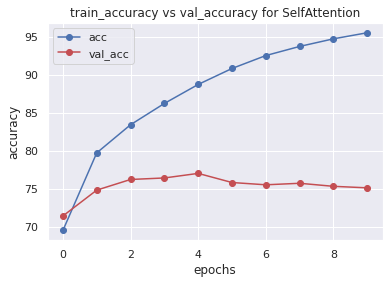

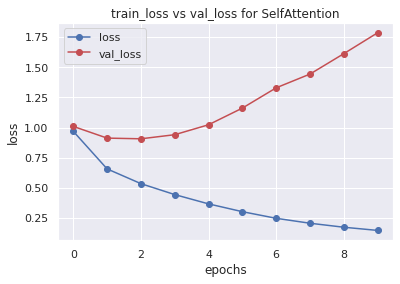

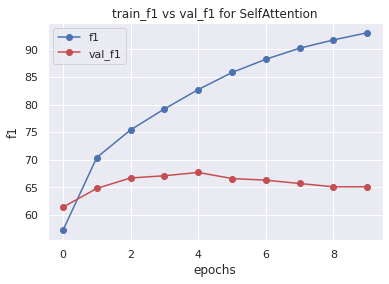

train_accuracy vs val_accuracy for  BiLSTM_2DMAX_POOLING_2D_CNN
----------------------
----------------------
model Name:  BiLSTM_2DMAX_POOLING_2D_CNN
BiLSTM_2DMAX_POOLING_2D_CNN has 2,682,330 trainable parameters

Training Started...

BEST Epoch(1 | 0.62/min) Train(loss: 1.0889 | acc: 65.6 | f1-score: 50.4) & Eval(loss: 0.9455 | acc: 71.2 | f1-score: 60.4)

BEST Epoch(2 | 0.60/min) Train(loss: 0.6892 | acc: 79.1 | f1-score: 69.4) & Eval(loss: 0.8515 | acc: 74.8 | f1-score: 64.1)

BEST Epoch(3 | 0.62/min) Train(loss: 0.541 | acc: 83.6 | f1-score: 75.7) & Eval(loss: 0.8243 | acc: 76.6 | f1-score: 66.6)

BEST Epoch(4 | 0.62/min) Train(loss: 0.4302 | acc: 87.1 | f1-score: 80.6) & Eval(loss: 0.8654 | acc: 76.9 | f1-score: 67.3)

Epoch(5 | 0.62/min) Train(loss: 0.3402 | acc: 89.9 | f1-score: 84.6) & Eval(loss: 0.9504 | acc: 76.4 | f1-score: 67.0)

Epoch(6 | 0.62/min) Train(loss: 0.2656 | acc: 92.2 | f1-score: 87.9) & Eval(loss: 1.048 | acc: 75.8 | f1-score: 66.6)

Epoch(7 | 0.60/min) Train(

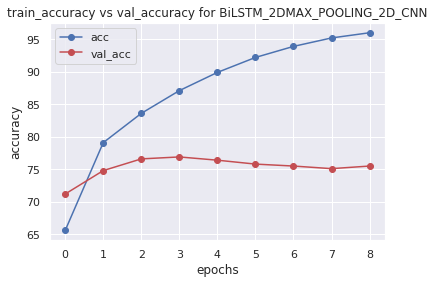

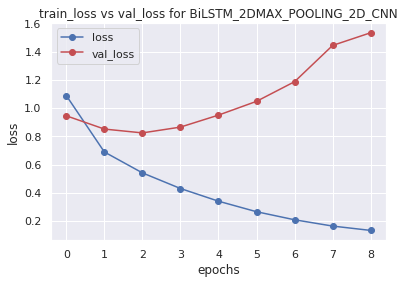

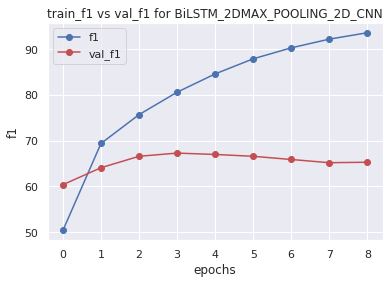

train_accuracy vs val_accuracy for  RCNN_Model
----------------------
----------------------
model Name:  RCNN_Model
RCNN_Model has 2,608,822 trainable parameters

Training Started...

BEST Epoch(1 | 0.58/min) Train(loss: 0.8964 | acc: 71.5 | f1-score: 59.2) & Eval(loss: 0.8817 | acc: 72.7 | f1-score: 62.4)

BEST Epoch(2 | 0.58/min) Train(loss: 0.6049 | acc: 81.0 | f1-score: 72.1) & Eval(loss: 0.8011 | acc: 75.9 | f1-score: 66.0)

BEST Epoch(3 | 0.58/min) Train(loss: 0.4825 | acc: 84.9 | f1-score: 77.4) & Eval(loss: 0.8004 | acc: 76.8 | f1-score: 67.0)

BEST Epoch(4 | 0.58/min) Train(loss: 0.3833 | acc: 88.1 | f1-score: 81.7) & Eval(loss: 0.8252 | acc: 77.0 | f1-score: 67.4)

BEST Epoch(5 | 0.58/min) Train(loss: 0.3014 | acc: 90.7 | f1-score: 85.4) & Eval(loss: 0.8923 | acc: 77.1 | f1-score: 68.0)

BEST Epoch(6 | 0.58/min) Train(loss: 0.2327 | acc: 92.9 | f1-score: 88.9) & Eval(loss: 0.9864 | acc: 77.3 | f1-score: 68.1)

BEST Epoch(7 | 0.58/min) Train(loss: 0.1781 | acc: 94.6 | f1-scor

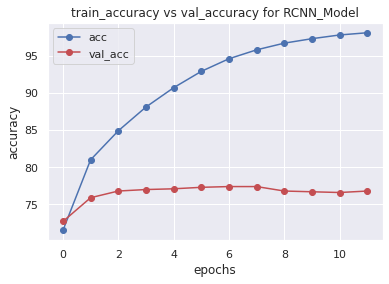

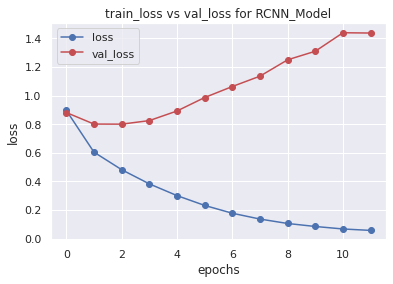

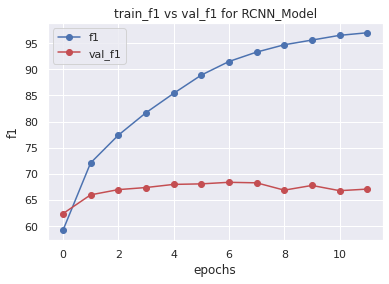

train_accuracy vs val_accuracy for  CNN_Model
----------------------
----------------------
model Name:  CNN_Model
CNN_Model has 2,481,626 trainable parameters

Training Started...

BEST Epoch(1 | 0.95/min) Train(loss: 1.2642 | acc: 59.3 | f1-score: 44.6) & Eval(loss: 1.012 | acc: 68.2 | f1-score: 56.6)

BEST Epoch(2 | 0.95/min) Train(loss: 0.8392 | acc: 74.2 | f1-score: 63.2) & Eval(loss: 0.8593 | acc: 73.7 | f1-score: 63.4)

BEST Epoch(3 | 0.95/min) Train(loss: 0.7162 | acc: 78.3 | f1-score: 68.5) & Eval(loss: 0.7988 | acc: 75.9 | f1-score: 65.8)

BEST Epoch(4 | 0.95/min) Train(loss: 0.6361 | acc: 80.7 | f1-score: 71.8) & Eval(loss: 0.7846 | acc: 76.4 | f1-score: 67.3)

BEST Epoch(5 | 0.95/min) Train(loss: 0.5738 | acc: 82.6 | f1-score: 74.1) & Eval(loss: 0.7753 | acc: 76.9 | f1-score: 67.6)

BEST Epoch(6 | 0.95/min) Train(loss: 0.519 | acc: 84.4 | f1-score: 76.6) & Eval(loss: 0.7799 | acc: 77.2 | f1-score: 68.6)

BEST Epoch(7 | 0.95/min) Train(loss: 0.475 | acc: 85.6 | f1-score: 78.

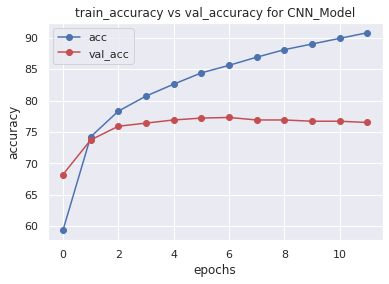

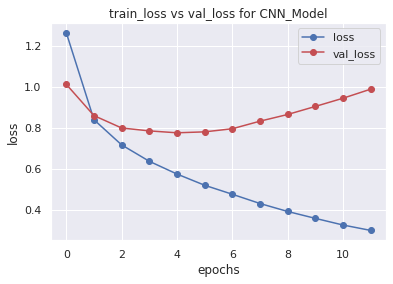

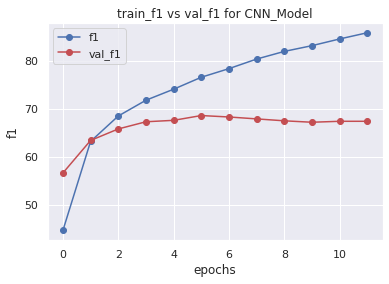

train_accuracy vs val_accuracy for  BiLSTM_concat_hiddens_Model
----------------------
----------------------
model Name:  BiLSTM_concat_hiddens_Model
BiLSTM_concat_hiddens_Model has 2,563,226 trainable parameters

Training Started...

BEST Epoch(1 | 0.58/min) Train(loss: 1.1561 | acc: 64.3 | f1-score: 48.1) & Eval(loss: 1.0212 | acc: 70.4 | f1-score: 59.4)

BEST Epoch(2 | 0.58/min) Train(loss: 0.78 | acc: 77.4 | f1-score: 66.9) & Eval(loss: 0.9005 | acc: 75.2 | f1-score: 64.8)

BEST Epoch(3 | 0.58/min) Train(loss: 0.6444 | acc: 81.7 | f1-score: 72.8) & Eval(loss: 0.8567 | acc: 77.0 | f1-score: 67.5)

BEST Epoch(4 | 0.58/min) Train(loss: 0.5497 | acc: 84.5 | f1-score: 76.8) & Eval(loss: 0.8667 | acc: 77.5 | f1-score: 68.0)

BEST Epoch(5 | 0.58/min) Train(loss: 0.4788 | acc: 86.6 | f1-score: 79.6) & Eval(loss: 0.9141 | acc: 77.9 | f1-score: 68.9)

BEST Epoch(6 | 0.58/min) Train(loss: 0.4138 | acc: 88.6 | f1-score: 82.3) & Eval(loss: 0.9417 | acc: 78.1 | f1-score: 68.7)

Epoch(7 | 0.58/m

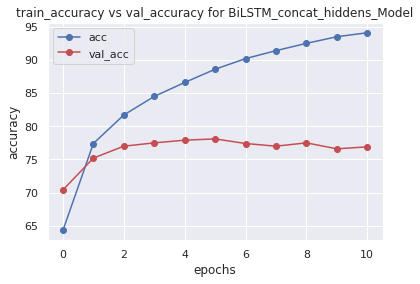

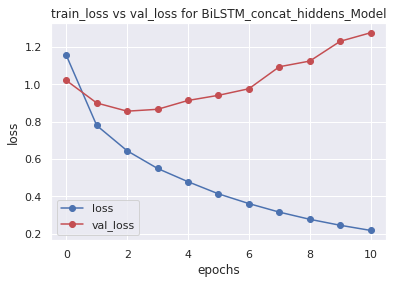

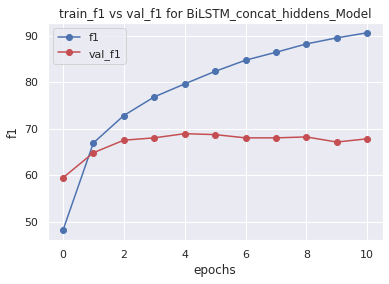

train_accuracy vs val_accuracy for  BiLSTM_Model
----------------------
----------------------
model Name:  BiLSTM_Model
BiLSTM_Model has 2,563,226 trainable parameters

Training Started...

BEST Epoch(1 | 0.58/min) Train(loss: 1.1481 | acc: 64.3 | f1-score: 48.5) & Eval(loss: 0.9873 | acc: 70.9 | f1-score: 60.3)

BEST Epoch(2 | 0.57/min) Train(loss: 0.7715 | acc: 77.6 | f1-score: 67.2) & Eval(loss: 0.8657 | acc: 75.4 | f1-score: 65.3)

BEST Epoch(3 | 0.57/min) Train(loss: 0.6387 | acc: 81.8 | f1-score: 73.1) & Eval(loss: 0.8444 | acc: 76.7 | f1-score: 67.0)

BEST Epoch(4 | 0.58/min) Train(loss: 0.5473 | acc: 84.6 | f1-score: 76.8) & Eval(loss: 0.8805 | acc: 77.2 | f1-score: 67.1)

BEST Epoch(5 | 0.57/min) Train(loss: 0.4742 | acc: 86.9 | f1-score: 80.0) & Eval(loss: 0.9124 | acc: 77.5 | f1-score: 68.4)

BEST Epoch(6 | 0.57/min) Train(loss: 0.4077 | acc: 88.7 | f1-score: 82.6) & Eval(loss: 0.974 | acc: 77.7 | f1-score: 68.6)

Epoch(7 | 0.58/min) Train(loss: 0.3543 | acc: 90.3 | f1-scor

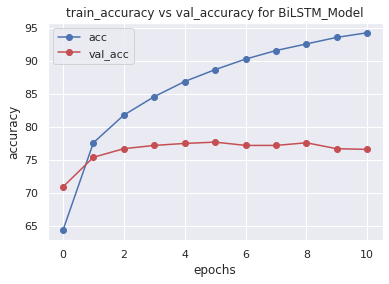

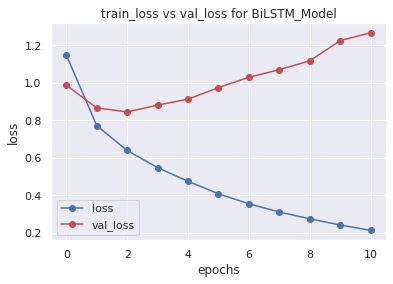

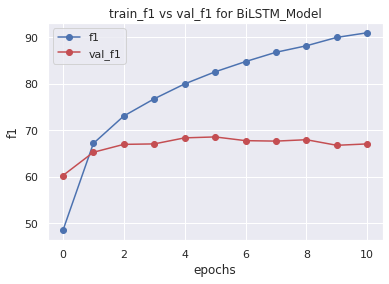

train_accuracy vs val_accuracy for  LSTM_Model
----------------------
----------------------
model Name:  LSTM_Model
LSTM_Model has 2,450,586 trainable parameters

Training Started...

BEST Epoch(1 | 0.42/min) Train(loss: 1.3004 | acc: 58.4 | f1-score: 38.7) & Eval(loss: 1.0727 | acc: 66.8 | f1-score: 54.2)

BEST Epoch(2 | 0.42/min) Train(loss: 0.8719 | acc: 74.6 | f1-score: 62.4) & Eval(loss: 0.8897 | acc: 73.7 | f1-score: 63.0)

BEST Epoch(3 | 0.42/min) Train(loss: 0.7161 | acc: 79.6 | f1-score: 69.7) & Eval(loss: 0.8175 | acc: 76.1 | f1-score: 66.6)

BEST Epoch(4 | 0.42/min) Train(loss: 0.6132 | acc: 82.8 | f1-score: 74.2) & Eval(loss: 0.8162 | acc: 77.2 | f1-score: 67.4)

Epoch(5 | 0.42/min) Train(loss: 0.5371 | acc: 85.1 | f1-score: 77.4) & Eval(loss: 0.8215 | acc: 77.0 | f1-score: 67.4)

BEST Epoch(6 | 0.42/min) Train(loss: 0.4726 | acc: 87.1 | f1-score: 80.3) & Eval(loss: 0.8443 | acc: 77.6 | f1-score: 68.2)

BEST Epoch(7 | 0.42/min) Train(loss: 0.4218 | acc: 88.7 | f1-score: 82

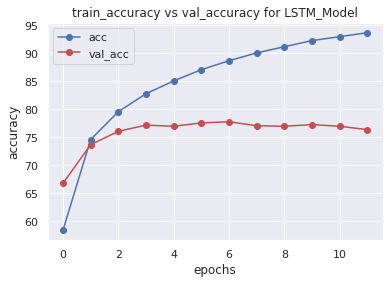

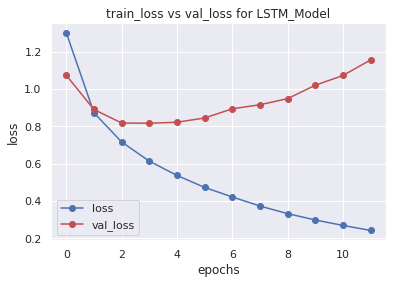

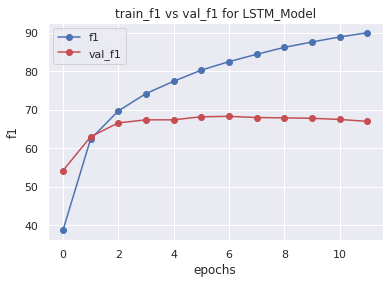

train_accuracy vs val_accuracy for  BERT
----------------------
----------------------
model Name:  BERT
BERT has 7,690 trainable parameters

Training Started...

BEST Epoch(1 | 25.00/min) Train(loss: 0.9458 | acc: 69.8 | f1-score: 56.2) & Eval(loss: 1.1357 | acc: 65.4 | f1-score: 52.2)

BEST Epoch(2 | 25.02/min) Train(loss: 0.8979 | acc: 71.5 | f1-score: 58.6) & Eval(loss: 1.0709 | acc: 67.3 | f1-score: 54.2)

Epoch(3 | 25.03/min) Train(loss: 0.8914 | acc: 71.6 | f1-score: 58.7) & Eval(loss: 1.0791 | acc: 67.3 | f1-score: 54.3)

BEST Epoch(4 | 25.10/min) Train(loss: 0.8882 | acc: 71.7 | f1-score: 58.7) & Eval(loss: 1.0727 | acc: 67.5 | f1-score: 54.8)



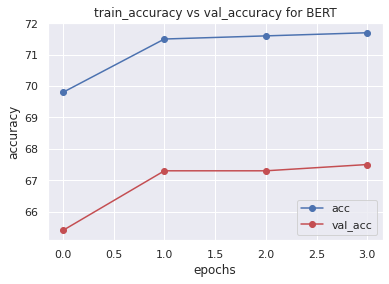

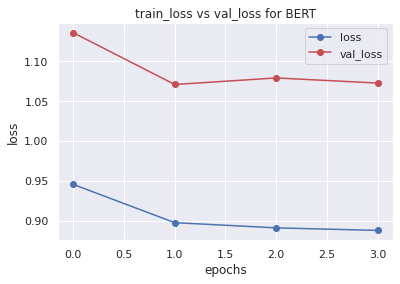

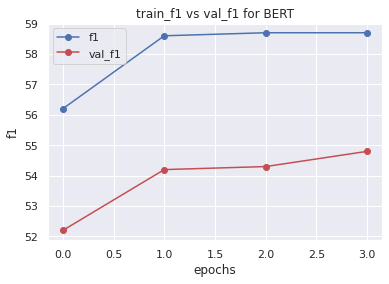

In [ ]:
def count_parameters(model):
    # to know how many parametres a 'trained' model has  
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# set the training loss
loss_function = nn.CrossEntropyLoss().to(device)

for clf in models:
    print("train_accuracy vs val_accuracy for ", str(type(clf).__name__))
    print('----------------------')
    print('----------------------')
    print('model Name: ', type(clf).__name__) # print Model Name
    print(f'{type(clf).__name__} has {count_parameters(clf):,} trainable parameters') # print Model Total Parameters 
    clf = clf.to(device) # convert model to GPU memory for fast training
    optimizer = optim.AdamW(clf.parameters(), lr=.001) # assign AdamW as optimizer
    
    # use non-BERT data if model name is not 'BERT'
    if type(clf).__name__ != 'BERT':
        training_losses, training_f1, training_acc, test_losses, test_f1, test_acc = training_model(clf, optimizer, loss_function, train_loader, val_loader, epochs=100, using_features=False)
    else: 
        # use BERT data if model name is 'BERT'
        training_losses, training_f1, training_acc, test_losses, test_f1, test_acc = training_model(clf, optimizer, loss_function, bert_train_loader, bert_val_loader, epochs=4, using_features=False)


    # Plot accuracy
    plt.plot(training_acc,'bo-', label = "acc")
    plt.plot(test_acc, 'ro-', label = "val_acc")
    plt.title("train_accuracy vs val_accuracy for {}".format(type(clf).__name__))
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot loss function
    plt.plot(training_losses,'bo-', label = "loss")
    plt.plot(test_losses, 'ro-', label = "val_loss")
    plt.title("train_loss vs val_loss for {}".format(type(clf).__name__))
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot f1 function
    plt.plot(training_f1,'bo-', label = "f1")
    plt.plot(test_f1, 'ro-', label = "val_f1")
    plt.title("train_f1 vs val_f1 for {}".format(type(clf).__name__))
    plt.ylabel("f1")
    plt.xlabel("epochs")
    plt.grid(True)
    plt.legend()
    plt.show()

# 9.3- Test Models Accuracies

In this section, we will predict 'val_loader' data and take every model scores with its name just to make statistics that tell us how good are the models later.

In [ ]:
# create lists to append all models details
loss_list = []
f1_list = []
accuracy_list = []
name_list = []

# use 'pred' function to extract: loss, f1, accuracy and name of every model
for clf in models:
    if type(clf).__name__ != 'BERT': # use non-BERT data if model name is not 'BERT'
        loss, f1, accuracy, name = pred(clf, test_loader, using_features=False)
    else: 
        # use BERT data if model name is 'BERT'
        loss, f1, accuracy, name = pred(clf, bert_test_loader, using_features=False)
    
    # append info values
    loss_list.append(loss)
    f1_list.append(f1)
    accuracy_list.append(accuracy)
    name_list.append(name)

# Save models info to a DataFrame
records_1 = pd.DataFrame({'loss': loss_list, 'f1-score': f1_list, 'accuracy-score': accuracy_list, 'name': name_list})
records_1['training_type'] = 'no_pretrained_embedding'

records_1.to_csv('records_1.csv', index=False)
records_1 = pd.read_csv('../input/records/records_1 (2).csv')
print(records_1)

FileNotFoundError: ignored

---
# 10- Training Models With Pre-Trained Embedding (Freezed)

In this section, we will train every model with *Pre-Trained Embedding (Freezed) layers*.


# 10.1- Assigen Parameters

In [51]:
vocab_size = len(word2index)
embedding_dim = 100
output_size = len(unique_classes)

hidden_size = 64
n_filters = 64
n_layers = 2
filter_sizes = [2, 3, 5, 7]
print('Size Of Vocab: ', vocab_size)

model1 = SelfAttention(vocab_size, embedding_dim, hidden_size, output_size, n_layers)
model2 = BiLSTM_2DMAX_POOLING_2D_CNN(vocab_size, embedding_dim, hidden_size, n_filters, n_layers, output_size)
model3 = RCNN_Model(vocab_size, embedding_dim, hidden_size, n_layers, output_size)
model4 = CNN_Model(vocab_size, embedding_dim, n_filters, filter_sizes, output_size)
model5 = BiLSTM_concat_hiddens_Model(vocab_size, embedding_dim, hidden_size, n_layers, output_size)
model6 = BiLSTM_Model(vocab_size, embedding_dim, hidden_size, n_layers, output_size)
model7 = LSTM_Model(vocab_size, embedding_dim, hidden_size, n_layers, output_size)

models = [model1, model2, model3, model4, model5, model6, model7]


Size Of Vocab:  23700


# 10.2- Training Models

----------------------
----------------------
model Name:  SelfAttention
SelfAttention has 3,091,610 trainable parameters

Training Started...

BEST Epoch(1 | 0.58/min) Train(loss: 0.7449 | acc: 76.6 | f1-score: 66.1) & Eval(loss: 0.8984 | acc: 74.2 | f1-score: 64.4)

BEST Epoch(2 | 0.58/min) Train(loss: 0.6315 | acc: 80.1 | f1-score: 71.2) & Eval(loss: 0.8181 | acc: 76.3 | f1-score: 66.6)

BEST Epoch(3 | 0.58/min) Train(loss: 0.5876 | acc: 81.3 | f1-score: 72.9) & Eval(loss: 0.7762 | acc: 77.7 | f1-score: 68.3)

BEST Epoch(4 | 0.60/min) Train(loss: 0.5556 | acc: 82.3 | f1-score: 74.2) & Eval(loss: 0.771 | acc: 77.8 | f1-score: 68.5)

BEST Epoch(5 | 0.62/min) Train(loss: 0.5298 | acc: 83.2 | f1-score: 75.4) & Eval(loss: 0.7433 | acc: 78.8 | f1-score: 70.0)

Epoch(6 | 0.58/min) Train(loss: 0.5083 | acc: 83.8 | f1-score: 76.1) & Eval(loss: 0.7542 | acc: 78.7 | f1-score: 69.6)

BEST Epoch(7 | 0.58/min) Train(loss: 0.4897 | acc: 84.4 | f1-score: 77.0) & Eval(loss: 0.752 | acc: 79.2 | f1-sc

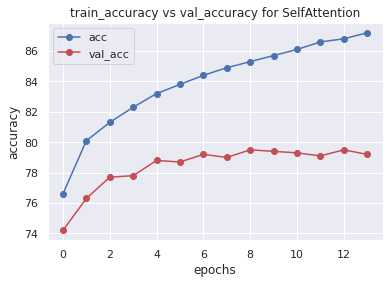

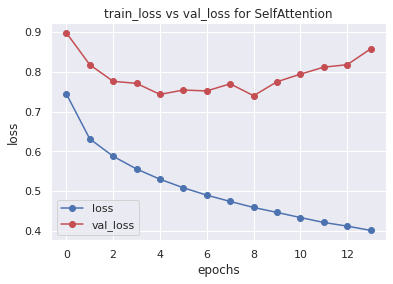

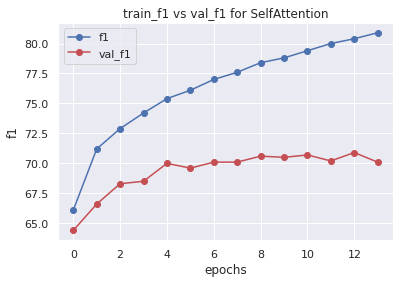

----------------------
----------------------
model Name:  BiLSTM_2DMAX_POOLING_2D_CNN
BiLSTM_2DMAX_POOLING_2D_CNN has 2,682,330 trainable parameters

Training Started...

BEST Epoch(1 | 0.60/min) Train(loss: 0.7847 | acc: 75.4 | f1-score: 64.2) & Eval(loss: 0.8128 | acc: 74.9 | f1-score: 65.2)

BEST Epoch(2 | 0.60/min) Train(loss: 0.6349 | acc: 80.1 | f1-score: 71.1) & Eval(loss: 0.717 | acc: 77.3 | f1-score: 67.7)

BEST Epoch(3 | 0.60/min) Train(loss: 0.5854 | acc: 81.6 | f1-score: 73.3) & Eval(loss: 0.7035 | acc: 78.0 | f1-score: 68.8)

BEST Epoch(4 | 0.60/min) Train(loss: 0.5471 | acc: 82.8 | f1-score: 74.9) & Eval(loss: 0.6931 | acc: 78.4 | f1-score: 69.1)

BEST Epoch(5 | 0.62/min) Train(loss: 0.5161 | acc: 83.8 | f1-score: 76.2) & Eval(loss: 0.6931 | acc: 78.8 | f1-score: 69.6)

Epoch(6 | 0.60/min) Train(loss: 0.4908 | acc: 84.6 | f1-score: 77.3) & Eval(loss: 0.7007 | acc: 78.7 | f1-score: 69.4)

Epoch(7 | 0.60/min) Train(loss: 0.4678 | acc: 85.3 | f1-score: 78.3) & Eval(loss: 0.

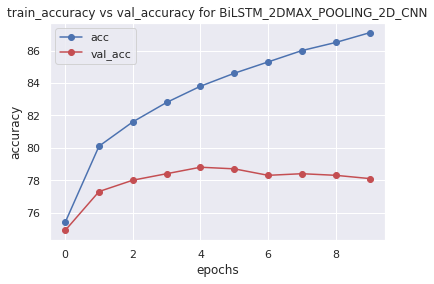

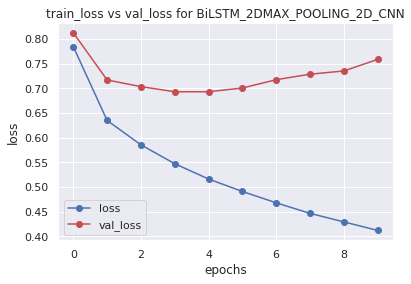

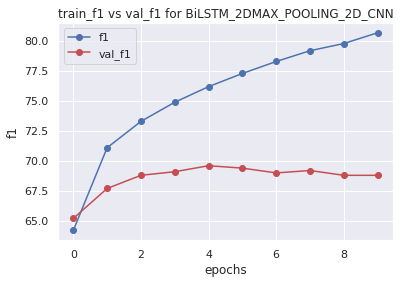

----------------------
----------------------
model Name:  RCNN_Model
RCNN_Model has 2,608,822 trainable parameters

Training Started...

BEST Epoch(1 | 0.57/min) Train(loss: 0.6761 | acc: 78.3 | f1-score: 68.4) & Eval(loss: 0.8123 | acc: 75.7 | f1-score: 66.1)

BEST Epoch(2 | 0.57/min) Train(loss: 0.5794 | acc: 81.4 | f1-score: 73.0) & Eval(loss: 0.748 | acc: 77.3 | f1-score: 67.6)

BEST Epoch(3 | 0.58/min) Train(loss: 0.5354 | acc: 82.8 | f1-score: 74.9) & Eval(loss: 0.726 | acc: 78.0 | f1-score: 68.6)

BEST Epoch(4 | 0.58/min) Train(loss: 0.502 | acc: 83.8 | f1-score: 76.3) & Eval(loss: 0.711 | acc: 78.9 | f1-score: 69.7)

BEST Epoch(5 | 0.58/min) Train(loss: 0.4747 | acc: 84.8 | f1-score: 77.6) & Eval(loss: 0.7207 | acc: 79.1 | f1-score: 69.9)

BEST Epoch(6 | 0.58/min) Train(loss: 0.4509 | acc: 85.5 | f1-score: 78.4) & Eval(loss: 0.7174 | acc: 79.3 | f1-score: 70.3)

BEST Epoch(7 | 0.58/min) Train(loss: 0.4298 | acc: 86.1 | f1-score: 79.3) & Eval(loss: 0.7268 | acc: 79.4 | f1-score

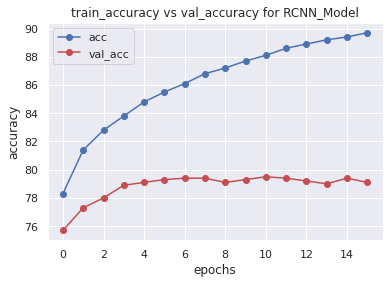

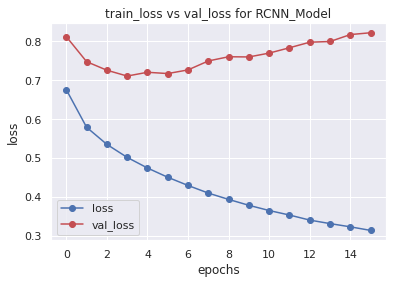

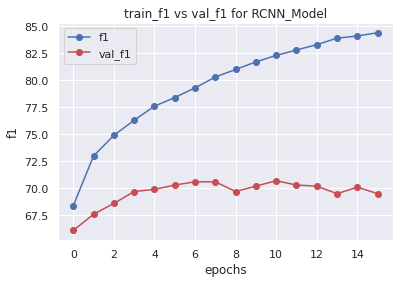

----------------------
----------------------
model Name:  CNN_Model
CNN_Model has 2,481,626 trainable parameters

Training Started...

BEST Epoch(1 | 0.90/min) Train(loss: 0.8712 | acc: 72.7 | f1-score: 61.1) & Eval(loss: 0.8729 | acc: 73.2 | f1-score: 62.9)

BEST Epoch(2 | 0.90/min) Train(loss: 0.7877 | acc: 75.7 | f1-score: 65.4) & Eval(loss: 0.8409 | acc: 74.1 | f1-score: 63.8)

BEST Epoch(3 | 0.92/min) Train(loss: 0.7609 | acc: 76.6 | f1-score: 66.8) & Eval(loss: 0.8306 | acc: 75.0 | f1-score: 64.9)

BEST Epoch(4 | 0.92/min) Train(loss: 0.7438 | acc: 77.0 | f1-score: 67.2) & Eval(loss: 0.82 | acc: 75.2 | f1-score: 65.1)

Epoch(5 | 0.90/min) Train(loss: 0.7284 | acc: 77.5 | f1-score: 67.9) & Eval(loss: 0.8106 | acc: 75.0 | f1-score: 65.5)

Epoch(6 | 0.92/min) Train(loss: 0.7165 | acc: 77.9 | f1-score: 68.3) & Eval(loss: 0.8182 | acc: 74.5 | f1-score: 64.7)

Epoch(7 | 0.90/min) Train(loss: 0.7051 | acc: 78.2 | f1-score: 68.7) & Eval(loss: 0.811 | acc: 75.2 | f1-score: 65.6)

Epoch(8

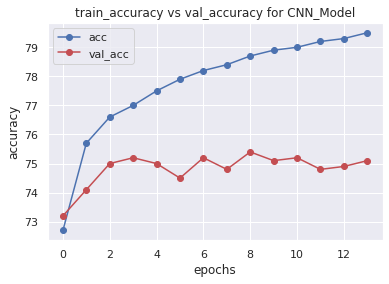

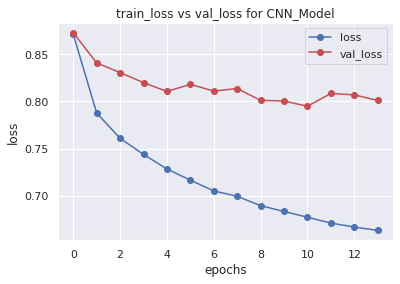

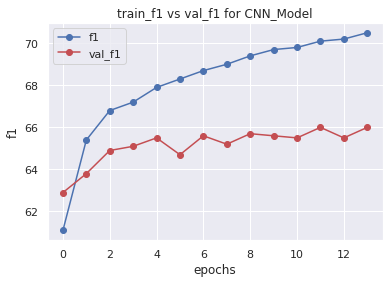

----------------------
----------------------
model Name:  BiLSTM_concat_hiddens_Model
BiLSTM_concat_hiddens_Model has 2,563,226 trainable parameters

Training Started...

BEST Epoch(1 | 0.58/min) Train(loss: 0.8842 | acc: 73.8 | f1-score: 61.5) & Eval(loss: 0.8311 | acc: 74.8 | f1-score: 65.2)

BEST Epoch(2 | 0.58/min) Train(loss: 0.7015 | acc: 79.4 | f1-score: 70.2) & Eval(loss: 0.7388 | acc: 78.0 | f1-score: 69.1)

BEST Epoch(3 | 0.58/min) Train(loss: 0.6465 | acc: 81.0 | f1-score: 72.1) & Eval(loss: 0.7321 | acc: 78.2 | f1-score: 69.4)

BEST Epoch(4 | 0.58/min) Train(loss: 0.6086 | acc: 82.0 | f1-score: 73.7) & Eval(loss: 0.7205 | acc: 78.9 | f1-score: 70.3)

BEST Epoch(5 | 0.58/min) Train(loss: 0.582 | acc: 82.7 | f1-score: 74.5) & Eval(loss: 0.7097 | acc: 79.4 | f1-score: 70.5)

Epoch(6 | 0.58/min) Train(loss: 0.5573 | acc: 83.4 | f1-score: 75.5) & Eval(loss: 0.7136 | acc: 79.4 | f1-score: 70.3)

BEST Epoch(7 | 0.60/min) Train(loss: 0.5375 | acc: 83.9 | f1-score: 76.1) & Eval(los

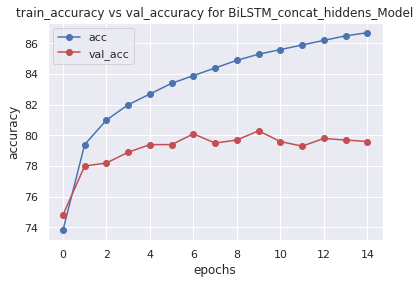

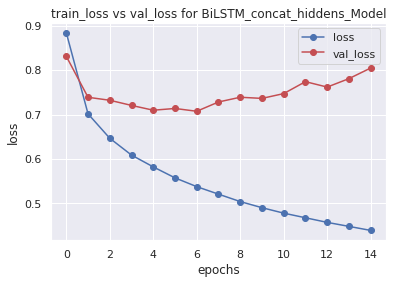

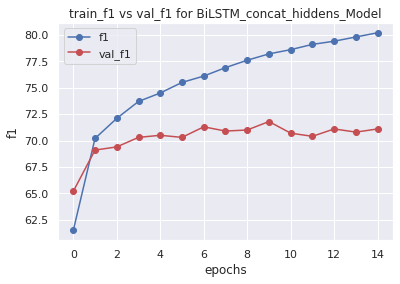

----------------------
----------------------
model Name:  BiLSTM_Model
BiLSTM_Model has 2,563,226 trainable parameters

Training Started...

BEST Epoch(1 | 0.57/min) Train(loss: 0.883 | acc: 73.8 | f1-score: 61.7) & Eval(loss: 0.8248 | acc: 75.1 | f1-score: 65.2)

BEST Epoch(2 | 0.58/min) Train(loss: 0.701 | acc: 79.4 | f1-score: 70.2) & Eval(loss: 0.7415 | acc: 77.6 | f1-score: 68.3)

BEST Epoch(3 | 0.58/min) Train(loss: 0.6444 | acc: 81.0 | f1-score: 72.4) & Eval(loss: 0.7115 | acc: 78.4 | f1-score: 69.6)

BEST Epoch(4 | 0.57/min) Train(loss: 0.6078 | acc: 82.0 | f1-score: 73.7) & Eval(loss: 0.7068 | acc: 78.8 | f1-score: 70.0)

BEST Epoch(5 | 0.58/min) Train(loss: 0.5791 | acc: 82.8 | f1-score: 74.8) & Eval(loss: 0.7089 | acc: 79.1 | f1-score: 70.4)

BEST Epoch(6 | 0.57/min) Train(loss: 0.5533 | acc: 83.4 | f1-score: 75.6) & Eval(loss: 0.697 | acc: 79.4 | f1-score: 71.0)

Epoch(7 | 0.58/min) Train(loss: 0.5362 | acc: 84.0 | f1-score: 76.4) & Eval(loss: 0.7283 | acc: 78.8 | f1-score

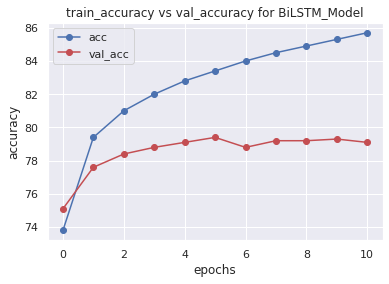

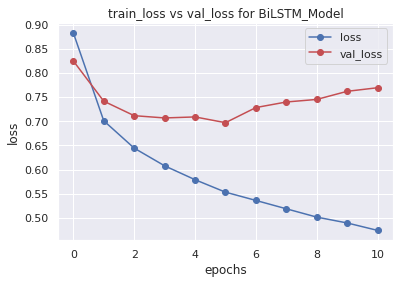

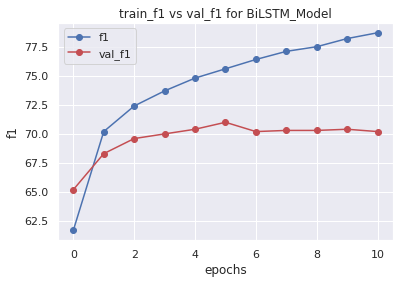

----------------------
----------------------
model Name:  LSTM_Model
LSTM_Model has 2,450,586 trainable parameters

Training Started...

BEST Epoch(1 | 0.42/min) Train(loss: 0.9514 | acc: 72.2 | f1-score: 58.9) & Eval(loss: 0.8499 | acc: 74.1 | f1-score: 63.2)

BEST Epoch(2 | 0.40/min) Train(loss: 0.7529 | acc: 78.2 | f1-score: 68.4) & Eval(loss: 0.7535 | acc: 76.7 | f1-score: 67.1)

BEST Epoch(3 | 0.42/min) Train(loss: 0.6959 | acc: 79.7 | f1-score: 70.5) & Eval(loss: 0.745 | acc: 77.3 | f1-score: 67.6)

BEST Epoch(4 | 0.42/min) Train(loss: 0.6603 | acc: 80.6 | f1-score: 71.7) & Eval(loss: 0.7189 | acc: 78.1 | f1-score: 69.5)

BEST Epoch(5 | 0.40/min) Train(loss: 0.6381 | acc: 81.3 | f1-score: 72.7) & Eval(loss: 0.714 | acc: 78.5 | f1-score: 69.7)

BEST Epoch(6 | 0.40/min) Train(loss: 0.6171 | acc: 81.7 | f1-score: 73.1) & Eval(loss: 0.7066 | acc: 78.6 | f1-score: 70.2)

BEST Epoch(7 | 0.40/min) Train(loss: 0.6038 | acc: 82.2 | f1-score: 73.9) & Eval(loss: 0.7035 | acc: 79.2 | f1-sco

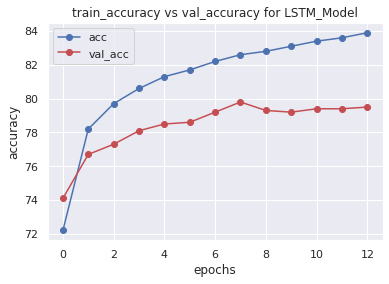

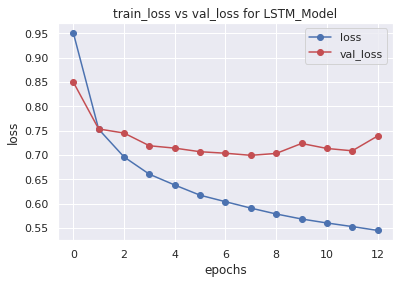

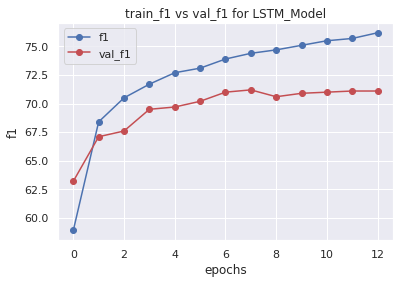

In [52]:
def count_parameters(model):
    # to know how many parametres a 'trained' model has  
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# set the training loss
loss_function = nn.CrossEntropyLoss().to(device)

for clf in models:
    print('----------------------')
    print('----------------------')
    print('model Name: ', type(clf).__name__) # print Model Name
    print(f'{type(clf).__name__} has {count_parameters(clf):,} trainable parameters') # print Model Total Parameters 
    clf = clf.to(device) # convert model to GPU memory for fast training
    optimizer = optim.AdamW(clf.parameters(), lr=.001) # assign AdamW as optimizer
    
    # use non-BERT data if model name is not 'BERT'
    if type(clf).__name__ != 'BERT':
        
        # assign the pretraind embedding_matrix to the 'Embedding' layer
        clf.Embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        # Freeze the 'Embedding' layer weights
        clf.Embedding.weight.requires_grad = False
        clf = clf.to(device) # convert model with Embedding to GPU memory for fast training

        training_losses, training_f1, training_acc, test_losses, test_f1, test_acc = training_model(clf, optimizer, loss_function, train_loader, val_loader, epochs=100, using_features=False)

        
        # Since BERT is freezed, there is no embedding to train and test its prediction, so BERT will not be included in this section."""
        # Plot accuracy
        plt.plot(training_acc,'bo-', label = "acc")
        plt.plot(test_acc, 'ro-', label = "val_acc")
        plt.title("train_accuracy vs val_accuracy for {}".format(type(clf).__name__))
        plt.ylabel("accuracy")
        plt.xlabel("epochs")
        plt.grid(True)
        plt.legend()
        plt.show()

        # Plot loss function
        plt.plot(training_losses,'bo-', label = "loss")
        plt.plot(test_losses, 'ro-', label = "val_loss")
        plt.title("train_loss vs val_loss for {}".format(type(clf).__name__))
        plt.ylabel("loss")
        plt.xlabel("epochs")
        plt.grid(True)
        plt.legend()
        plt.show()

        # Plot f1 function
        plt.plot(training_f1,'bo-', label = "f1")
        plt.plot(test_f1, 'ro-', label = "val_f1")
        plt.title("train_f1 vs val_f1 for {}".format(type(clf).__name__))
        plt.ylabel("f1")
        plt.xlabel("epochs")
        plt.grid(True)
        plt.legend()
        plt.show()

# 10.3- Test Models Accuracies

In [53]:
# create lists to append all models details
loss_list = []
f1_list = []
accuracy_list = []
name_list = []

# use 'pred' function to extract: loss, f1, accuracy and name of every model
for clf in models:
    if type(clf).__name__ != 'BERT': # use non-BERT data if model name is not 'BERT'
        loss, f1, accuracy, name = pred(clf, test_loader, using_features=False)
        
        # Since BERT is freezed, there is no embedding to train and test its prediction, so BERT will not be included in this section.

    # append info values
    loss_list.append(loss)
    f1_list.append(f1)
    accuracy_list.append(accuracy)
    name_list.append(name)

# Save models info to a DataFrame
records_2 = pd.DataFrame({'loss': loss_list, 'f1-score': f1_list, 'accuracy-score': accuracy_list, 'name': name_list})
# records_2['training_type'] = 'pretrained_embedding'
# records_2.to_csv('records_2.csv', index=False)

# records_2 = pd.read_csv('../input/records/records_2 (1).csv')
# print(records_2)
